This is work of Alina Dzemiantsevich
ademencevich@gmail.com

# Research on car sales ads

**Task**:You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Opening the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns

#data = pd.read_csv('/datasets/vehicles_us.csv')
data = pd.read_csv('vehicles_us.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [2]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion

In description of data I see that there a lot of missing values in many columns. So I need to check each one to make sure that mistakes or outliers in the data won't influence of a further analysis.

As I can see from the data about main indexes such mean, standard deviation, min value: 

- The min price is 1.0 it's interesting to check what product cost only 1 dollar or euro. 
- The median value of price is 9000, where the max price is 375K. 
- The min model year of the car or in other words the oldest is 1908, so we can make a conclusion that it is likely a vintage car. Maybe this particular car cost 375K?
- The newest car is of 2019 year.
- In the stat data of number of cylinders everything looks normal. The max number of cylinders is 12, I think it can be some sport car.
- Odometr with mileage 990000.000000 is quite big (max value). I would check it if there aren't any mistake or outlier. But it also can be a real number.
- As we can see we also have a brand new cars with zero mileage.
- We have 25572 values of 1.0 for column of if a car is 4wd, so I think we can make a conclusion that the other part of the data (51525 - 25572 =  25953) are the cars which aren't 4wd
- The longest time ads was places on a website was 271 days it's more than 2/3 of year. Quite long.
- There are ads which were removed in the same day when they were published. I think we also should check it - how many such ads we have.

### Step 2. Data preprocessing

**Processing of 'model_year' column**

In [4]:
#the first column in which there are missing data according to information from info() method is 'model_year'
#let's explore it more closely

data[data['model_year'].isna()].count()

price           3619
model_year         0
model           3619
condition       3619
cylinders       3256
fuel            3619
odometer        3070
transmission    3619
type            3619
paint_color     2967
is_4wd          1808
date_posted     3619
days_listed     3619
dtype: int64

We have 3619 rows with no data about model year of a car.
This is about 7% of data.

In [5]:
data[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


Let's check if 'model' column do not contain missing values. Because I will use this column to build a pivot table. 

In [6]:
#Overall among all ads only 100 models of cars are represented. 
#At the same time in 'model' column we don't have missing values.
data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [7]:
#we don't have None or empty rows ' ' in column 'model'
len(data[data['model']=='None'])

0

In [8]:
data[data['model'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [9]:
#build pivot table with min, max, median and average of model year for each car model
model_year_stat = data.pivot_table(index='model',values='model_year',aggfunc=['mean','median','min','max'])
model_year_stat

,mean,median,min,max
,model_year,model_year,model_year,model_year
model,,,,
acura tl,2007.517857,2007.0,1999.0,2014.0
bmw x5,2008.991870,2010.0,2001.0,2018.0
buick enclave,2012.194553,2012.0,2008.0,2018.0
cadillac escalade,2008.508475,2009.0,1908.0,2019.0
chevrolet camaro,2008.397959,2013.0,1967.0,2019.0
...,...,...,...,...
toyota sienna,2008.584416,2008.0,1998.0,2019.0
toyota tacoma,2009.331599,2010.0,1989.0,2019.0


I will use median value of 'model_year' column for each particular model to fill the NaNs.
For this let's update the pivot_table model_year_stat to save there only median value of 'model_year'. 

In [10]:
model_year_stat = data.pivot_table(index='model',values='model_year',aggfunc='median')

In [11]:
#join median value of model year column into data as model_year_
data = data.join(model_year_stat,on='model',how='left',rsuffix='_')
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2010.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2012.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2011.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2014.0


Let's create a new column 'model_year_filled' where NaNs will be filled with median value of model year for each model.  At the same time I will keep the original 'model_year' column as it is, because in pivot table model_year_stat we see that there are a lot of models where values dispersion from min to median and max value of model year is huge. So to not mess up the data I will also safe the 'model_year' column with NaNs.

In [12]:
data['model_year_filled'] = data['model_year'].where(data['model_year'].notnull(),data['model_year_'])
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_,model_year_filled
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2010.0,2011.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0,2011.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2012.0,2013.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2011.0,2003.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2014.0,2017.0


In [13]:
#Here we can see that in 'model_year_filled' column we have values when in 'model_year' column are NaNs
data[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_,model_year_filled
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0,2011.0
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,2009.0,2009.0
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15,2011.0,2011.0
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39,2011.0,2011.0
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,2011.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24,2008.0,2008.0
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13,2008.0,2008.0
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56,2011.0,2011.0
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37,2013.0,2013.0


In [14]:
#And we don't have NaNs in new column of 'model_year_filled'
data[data['model_year_filled'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_,model_year_filled


In [15]:
#delete the column with median values of model year
data.drop(columns='model_year_',inplace=True)
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017.0


Let's also convert 'model_year' and 'model_year_filled' columns into int type to get rid of '.0' ending

In [16]:
data['model_year_filled'] = data['model_year_filled'].astype('int')
data['model_year'] = pd.to_numeric(data['model_year'],errors='coerce').astype(pd.Int64Dtype())
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017


Now we can analyze both original 'model_year' column and 'model_year_filled'. 

**Processing of 'cylinders' column**

In [17]:
#Let's explore the next column with missing data 'cylinders'
data['cylinders'].isnull().sum()

5260

We have 5260 rows with null values in 'cylinders' column. This is about 10,20% of the data. I think we can replace the missing values with median value. Let's check some data for it.

In [18]:
#So let's count the average (mean) and median number of cylinders for each model
data.pivot_table(index='model',values='cylinders',aggfunc=['mean','median'])

,mean,median
,cylinders,cylinders
model,,
acura tl,5.971564,6.0
bmw x5,6.406375,6.0
buick enclave,6.000000,6.0
cadillac escalade,7.986395,8.0
chevrolet camaro,6.887097,6.0
...,...,...
toyota sienna,5.952381,6.0
toyota tacoma,5.345205,6.0


In [19]:
#Looking on this too pivot_tables I can say It's better to use median value.
#it's rounded and mathematically almoust the same as mean value of cylinders for each model

models_stat = data.pivot_table(index='model',values='cylinders',aggfunc='median')
models_stat

,cylinders
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


So now we have a median value of cylinders for each model and we can use it to replace missing values

In [20]:
data = data.join(models_stat,on='model',how='left',rsuffix='_')
data[data['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,cylinders_
9,9200,2008,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008,6.0
36,10499,2013,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22,2013,6.0
37,7500,2005,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44,2005,6.0
59,5200,2006,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2,2006,6.0
63,30000,1966,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17,1966,6.0


In [21]:
#Now replace NaN values in 'cylinders' with median value of cylinders for each car model
data['cylinders'].fillna(data['cylinders_'], inplace=True)
#Now we don't have NaN in cylinders
data[data['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,cylinders_


In [22]:
data['cylinders'].value_counts()

8.0     17712
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [23]:
#Let's drop 'cylinders_' and 'model_' columns
data.drop(columns=['cylinders_'],inplace=True)
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017


Now we have everything in order in 'cylinders' column

**Processing of 'odometer' column**

In [24]:
#Next column where were missing value is column 'odometer'
data['odometer'].isnull().sum()

7892

We have 7892 rows with missing values of odometer column, this is 15,31% of database. So it's a lot. Odometer is important factor for car ad. Every person buying a new car take a look on car's mileage. So we need to fill the missing values.

In [25]:
#Let's count an average and median mileage for each car model
odo_stat = data.pivot_table(index='model',values='odometer',aggfunc=['mean','median'])
odo_stat

,mean,median
,odometer,odometer
model,,
acura tl,142760.442786,141000.0
bmw x5,113210.140351,108500.0
buick enclave,113459.513274,113728.0
cadillac escalade,123616.592453,129176.0
chevrolet camaro,71067.983784,62655.5
...,...,...
toyota sienna,136911.099644,140715.0
toyota tacoma,126521.257426,125000.0


Let's replace the missing values with median value. 
I choose the median value not the mean as more precise and more close to reality.

In [26]:
#To more convenience, I will left only median value of odometer in the table with car models
odo_stat = data.pivot_table(index='model',values='odometer',aggfunc='median')
odo_stat

,odometer
model,
acura tl,141000.0
bmw x5,108500.0
buick enclave,113728.0
cadillac escalade,129176.0
chevrolet camaro,62655.5
...,...
toyota sienna,140715.0
toyota tacoma,125000.0
toyota tundra,120500.0


In [27]:
#I will join the median value of odometer for each car model into data table
#to replace the missing values with median value on the next step

data = data.join(odo_stat,on='model',how='left',rsuffix='_')
data.tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37,2013,102300.0
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22,2002,121000.0
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32,2009,105976.0
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71,2013,104300.0
51524,6300,2014,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10,2014,100319.5


In [28]:
#I will build a new column 'odometer_filled' 
#where for the NaN values of odometer column will be used median mileage for each car model

data['odometer_filled'] = data['odometer'].where(data['odometer'].notnull(),data['odometer_'])

In [29]:
#We can check that 'odometer_filled' column contain median mileage values when in 'odometer' column are NaNs
data[data['odometer'].isna()].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_,odometer_filled
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003,121928.0,121928.0
15,17990,2013,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2013,107871.0,107871.0
23,7500,2004,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,2004,99915.0,99915.0
24,3950,2009,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40,2009,85000.0,85000.0
25,11499,2017,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43,2017,98260.0,98260.0


In [30]:
#everything in place
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_,odometer_filled
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011,108500.0,145000.0
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011,121928.0,88705.0
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013,105976.0,110000.0
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003,121928.0,121928.0
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017,85000.0,80903.0


In [31]:
#Last one check up - in case if I missed something
len(data[data['odometer_filled'].isna()])

41

So as I had guessed unfortunately we have 41 NaN in combined column 'odometer_filled'. If take a more close look on the data - all these rows correspond to only one car model 'mercedes-benz benze sprinter 2500'.

So we don't have enough data about this particular model.

If we check if this model is presented in pivot table with median mileage for each model we see that aren't.

In [32]:
'mercedes-benz benze sprinter 2500' in odo_stat.index

False

In [33]:
#data[data['odometer_filled'].isna()]
data[data['odometer_filled'].isna()].head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_,odometer_filled
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16,2013,NaN,NaN
1642,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36,2013,NaN,NaN
2232,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70,2013,NaN,NaN


This is only 41 rows among 51525, or 0,08%. I think we can delete it without any harm to the results of analysis. 

What is interesting - when we filled the missing values in cylinders column or model year column we coudn't find these missing data about this model because each of 41 row of 'mercedes-benz benze sprinter 2500' contain data about number of cylinders and model year.

In [34]:
#data[data['model']=='mercedes-benz benze sprinter 2500'].count()
data.drop(data[data['model'] =='mercedes-benz benze sprinter 2500'].index, inplace=True)

In [35]:
#Now we don't have missing data about mileage.
len(data[data['odometer_filled'].isna()])

0

In [36]:
#get rid of column with median value of odometer for each model of car
data.drop(columns='odometer_',inplace=True)
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011,145000.0
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011,88705.0
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013,110000.0
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003,121928.0
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017,80903.0


Now we have both original 'odometer' and 'odometer_filled' columns to use it in further analysis.
Where the main difference between these two columns is - in 'odometer_filled' column are median values for each model of car when in 'odometer' column NaNs. Other values in both columns are the same.

**Processing of 'paint_color' column**

In [37]:
data[data['paint_color'].isna()].count()

price                9260
model_year           8610
model                9260
condition            9260
cylinders            9260
fuel                 9260
odometer             7812
transmission         9260
type                 9260
paint_color             0
is_4wd               4630
date_posted          9260
days_listed          9260
model_year_filled    9260
odometer_filled      9260
dtype: int64

We have here 9260 missing values in column 'paint_color'.  This is about 17,97% of database.

In [38]:
data[data['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011,145000.0
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003,121928.0
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2012,104174.0
12,18990,2012,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,2012,140742.0
21,5250,2007,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8,2007,154000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175,2011,111088.0
51503,6595,2011,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73,2011,100780.0
51506,28900,2017,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25,2017,49225.0
51519,11750,2015,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89,2015,131000.0


In [39]:
data['paint_color'].value_counts()

white     10029
black      7658
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Because no way to define which colour has to be to each row where are missing values I will replace each NaN with 'Other' colour. There is no other way to determine missing colours.

In [40]:
data['paint_color'].fillna('other', inplace=True)

In [41]:
data['paint_color'].value_counts()

white     10029
other      9260
black      7658
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [42]:
data[data['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled


Now the "other" colour is the second most popular colour.
But we can't do nothing with it. Anyway we don't have NaN in this column anymore. 

**Processing of 'is_4wd ' column**

In [43]:
#Let's see what we have in 'is_4wd' column
data['is_4wd'].isna().sum()

25912

Almost half of the dataset does not contain data in this column. Let's take a look on this column

In [44]:
data.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled
43649,9000,2006,toyota tacoma,good,6.0,gas,196608.0,automatic,pickup,white,NaN,2018-05-13,34,2006,196608.0
5374,2500,1998,ram 1500,fair,8.0,gas,140000.0,automatic,truck,blue,1.0,2018-10-25,38,1998,140000.0
22299,19950,2011,chevrolet silverado 2500hd,excellent,8.0,diesel,179184.0,automatic,truck,black,1.0,2018-07-24,19,2011,179184.0
34563,5500,2002,gmc sierra,excellent,6.0,gas,183000.0,manual,truck,blue,1.0,2018-06-09,9,2002,183000.0
18473,6400,<NA>,toyota prius,excellent,4.0,hybrid,NaN,automatic,hatchback,red,NaN,2018-07-06,21,2010,128000.0


In [45]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

We see here that only value which we can find in a column besides NaNs is 1.0. So I think it is obvious if a car is not 4wd then the value should be 0.0. So we can easily replace these NaNs

In [46]:
data['is_4wd'].fillna(0, inplace=True)

In [47]:
data['is_4wd'].value_counts()

0.0    25912
1.0    25572
Name: is_4wd, dtype: int64

Now it looks much better.

We proceed all the columns where according to the info method applied to the original dataset were missing values. Now I would check other columns where weren't such obvious missing values. If there are other types of Nones.

I won't explore 'Price' column now and I will leave it for chapter 4 of this notebook.

In [48]:
#In 'condition' column everything looks good
data['condition'].value_counts()

excellent    24732
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [49]:
#Unclear what is other type of fuel
#ok, let's leave it as it is
data['fuel'].value_counts()
#data[data['fuel']=='other'].head(5)

gas         47288
diesel       3673
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [50]:
#There are only two types of transmission, but here we also have other type. Anyway it's better than NaN
data['transmission'].value_counts()

automatic    46861
manual        2829
other         1794
Name: transmission, dtype: int64

In [51]:
#Everything looks ok
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              592
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

So we have two more columns which we did still not processed. These are: 'date_posted' and 'days_listed'. According to info() method these columns does not contain missing values, but we also see that 'date_posted' contain object type which shoud be a datetype and column 'days_listed' contain data of type int which is ok.
So let's convert 'date_posted' column into datetype.

**Processing of 'date_posted' column**

In [52]:
#Let's convert 'date_posted' column into datetime 
data['date_posted_datetime'] = pd.to_datetime(data['date_posted'],format='%Y.%m.%d')
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled,date_posted_datetime
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,2011,145000.0,2018-06-23
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011,88705.0,2018-10-19
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2013,110000.0,2019-02-07
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,other,0.0,2019-03-22,9,2003,121928.0,2019-03-22
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2017,80903.0,2019-04-02


In [53]:
#Looks like we do not have NaN values in this column.
data[data['date_posted_datetime'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled,date_posted_datetime


Let's check if the dataframe contain the duplicate rows.

In [54]:
#so we don't have duplicates here. Perfect.
data.duplicated().sum()

0

In [55]:
data[data.duplicated()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled,date_posted_datetime


### Conclusion

I identified, studied and when it was appropriate I filled in the missing values. 
I did it (filled in the missing values) for example for 'cylinders' and 'odometer' columns. 

I used median values of cylinders number and mileage number for each model and replaced NaNs. In case of 'odometer' column I left the original column with NaNs for further analysis. Mileage numbers do depend only on usage of auto. When for example number of cylinders is mostly the same for cars of one model, we can't say that for mileage. Mileage is very special case for each car. There are old cars with small number of mileage and there are relatively new cars with huge number of mileage. So we can't predict behavior of this factor so I left NaNs because of this. 

There were columns which missing values which was hard or impossible to fill. For example 'model_year' column. I built a pivot table with median, mean, min and max value of each car model model year. And this pivot table presented how wide a value dispersion is. So obviously I can't just replace missing model year with median value because it will harm the data. For this column I built an additional column with filled values and I left original column for further analysis of both.

In 'is_4wd' column was obvious how to replace missing values - all missing values were 0 when present values were 1. I think we had here that almost half of the data is missing, because of mechanics of filling the ad form. For example might be that user can check button if his car is 4wd, but there aren't a check box for not 4wd cars.

I deleted 41 rows of 'mercedes-benz benze sprinter 2500' car ads because I couldn't fill the missing value. 41 rows is only 0,08% of data. So I deleted it.

The dataset also had missing values in 'paint_color' column. About 17,9% of data do not contain entries about colour. I replaced these NaNs with 'other' colour. Unfortunately we can't find this information about the colout the other way. I think the reason why we have such missing values is only human factor, inaccuracy during filling ads form.

Dataset does not contain duplicate rows.

### Step 3. Make calculations and add them to the table

Let's calculate day of the week, month, and year the ad was placed

In [56]:
#calculating day of the week the ad was placed
data['day_of_the_week'] = data['date_posted_datetime'].dt.dayofweek

#calculating month the ad was placed
data['month_ad'] = pd.DatetimeIndex(data['date_posted_datetime']).month

#calculating year the ad was placed
data['year_ad'] = pd.DatetimeIndex(data['date_posted_datetime']).year

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_filled,odometer_filled,date_posted_datetime,day_of_the_week,month_ad,year_ad
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19,2011,145000.0,2018-06-23,5,6,2018
1,25500,<NA>,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011,88705.0,2018-10-19,4,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2013,110000.0,2019-02-07,3,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,other,0.0,2019-03-22,9,2003,121928.0,2019-03-22,4,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2017,80903.0,2019-04-02,1,4,2019


Let's calculate the vehicle's age (in years) when the ad was placed

In [57]:
#calculating vehicle's age with NaNs (original column)
data['vehicle_age'] = data['year_ad'] - data['model_year']

#calculating vehicle's age for the column with filled NaNs
data['vehicle_age_filled'] = data['year_ad'] - data['model_year_filled']

In [58]:
#Let's check what we got. Everything looks correct
data[['model_year','model_year_filled','year_ad','vehicle_age','vehicle_age_filled']].head(10)

,model_year,model_year_filled,year_ad,vehicle_age,vehicle_age_filled
0,2011,2011,2018,7,7
1,<NA>,2011,2018,<NA>,7
2,2013,2013,2019,6,6
3,2003,2003,2019,16,16
4,2017,2017,2019,2,2
5,2014,2014,2018,4,4
6,2015,2015,2018,3,3
7,2013,2013,2019,6,6
8,2012,2012,2018,6,6
9,2008,2008,2019,11,11


In [59]:
#We have 2128 cars with less than one year age when ad was placed in 'vehicle_age' column.
len(data[data['vehicle_age']==0])

2128

In [60]:
#We have the same number of missing data in 'vehicle_age' as in 'model_year' column. 
#It's not surprise. Will keep it in mind

len(data[data['vehicle_age'].isnull()])

3612

In [61]:
#We have 2152 cars with less than one year age when ad was placed in 'vehicle_age_filled' column. 
len(data[data['vehicle_age_filled']==0])

2152

In [62]:
#len(data[data['odometer'].isna()])
#len(data[data['vehicle_age'].isna()])
#len(data[data['vehicle_age_filled'].isna()])
#len(data[data['odometer_filled'].isna()])

Here let's calculate the vehicle's average mileage per year. Keep in mind that:
- The original 'odometer' column contains 7851 NaNs
- The 'odometer_filled' column do not contain NaNs
- The original'vehicle_age' column contains 3612 NaNs
- The 'vehicle_age_filled' column do not contain NaNs

To count the vehicle's average mileage per year let's divide vehicle's mileage to vehicle's age. Do not forget that we have zeroes in 'vehicle_age' column.

In [63]:
data['average_mileage'] = data['odometer']/data['vehicle_age']
data['average_mileage_filled'] = data['odometer_filled'] / data['vehicle_age_filled']

data[['odometer','vehicle_age','average_mileage','average_mileage_filled']].head(10)

,odometer,vehicle_age,average_mileage,average_mileage_filled
0,145000.0,7,20714.285714,20714.285714
1,88705.0,<NA>,NaN,12672.142857
2,110000.0,6,18333.333333,18333.333333
3,NaN,16,NaN,7620.500000
4,80903.0,2,40451.500000,40451.500000
5,57954.0,4,14488.500000,14488.500000
6,79212.0,3,26404.000000,26404.000000
7,109473.0,6,18245.500000,18245.500000
8,104174.0,6,17362.333333,17362.333333
9,147191.0,11,13381.000000,13381.000000


Let's consider the situation when year of the model is equal to the year when ad was placed. So vehicle_age in such situation will be equal to 0 and we got division by zero which will lead to infinity. 
Few cells above we count that we have 2128 rows with vehicle_age equal to 0. Logically if a car age is less than one year so average mileage of this car is equal to overall mileage until the car age become more than one year. So let's replace infinite values with overall mileage values for such rows.

<div class="alert alert-block alert-info">

<b>Idea to Improve: </b> The best solution is to calculate vehicle age as `year_ad - model_year + 1`.

</div>

In [64]:
data.loc[data['model_year'] == data['year_ad'], 'average_mileage'] = data['odometer']
data.loc[data['model_year_filled'] == data['year_ad'], 'average_mileage_filled'] = data['odometer_filled']

#So now we don't have inf in 'average_mileage' and 'average_mileage_filled' columns
#len(data[data['model_year'] == data['year_ad']])
data[data['model_year'] == data['year_ad']].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,model_year_filled,odometer_filled,date_posted_datetime,day_of_the_week,month_ad,year_ad,vehicle_age,vehicle_age_filled,average_mileage,average_mileage_filled
19,13990,2018,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,...,2018,31932.0,2018-08-25,5,8,2018,0,0,31932.0,31932.0
71,23300,2018,nissan frontier crew cab sv,good,6.0,gas,27493.0,other,pickup,other,...,2018,27493.0,2018-10-13,5,10,2018,0,0,27493.0,27493.0
78,23800,2019,nissan frontier crew cab sv,good,6.0,gas,10899.0,other,pickup,silver,...,2019,10899.0,2019-02-28,3,2,2019,0,0,10899.0,10899.0
99,39950,2018,chevrolet silverado,excellent,8.0,gas,18500.0,automatic,truck,other,...,2018,18500.0,2018-08-05,6,8,2018,0,0,18500.0,18500.0
106,21500,2019,nissan frontier crew cab sv,good,6.0,gas,16168.0,other,pickup,white,...,2019,16168.0,2019-03-29,4,3,2019,0,0,16168.0,16168.0


In [65]:
len(data[data['average_mileage'].isna()])

10921

We had 2128 inf values replaced to overall mileage for such cars. It's a lot.

We still we have 10923 NaNs in a new column because we had NaNs in original 'odometer' column and in original'vehicle_age' column. This is almost 1/5 of the dataset.

But when we counted average mileage for the filled column we should not have NaNs.
Let's check it.

In [66]:
#Here we are - we don't have NaNs in 'average_mileage_filled' column
len(data[data['average_mileage_filled'].isna()])

0

**Process condition column**
Let's replace string values in the condition column with a numeric scale: new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

In [67]:
#Let's see one more time how many of each value of 'condition' do we have
data['condition'].value_counts()

excellent    24732
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [68]:
#I wrote the user function to replace string values into nums
def condition_to_num (condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    else: 
        return 0

In [69]:
#Let's apply the function
data['condition_numeric'] = data['condition'].apply(condition_to_num)

In [70]:
#Everything looks correct
data['condition_numeric'].value_counts()

3    24732
2    20145
4     4742
1     1607
5      143
0      115
Name: condition_numeric, dtype: int64

### Conclusion

I calculated day of the week, month, and year when the ad was placed. This are columns day_of_the_week,	month_ad and year_ad accordingly.

I calculated the vehicle's age (in years) when the ad was placed. I made it using the original column with NaNs which I left for further analysis. I also calculated the vehicle's age using the column with filled NaNs so we can compare stats of these two columns. 

I noticed that there cases when model year of the car is equal to the year of the ad. So if person sell the car in the same year when car was produced we get zero age of the car. This caused infinite values when I counted average mileage per year for the vehicles. In such columns with inf I replaced values to overall mileage of the car. Is obvious that if car age is less that one year, average mileage for such car is equall to the overall mileage.

While calculating the vehicle's average mileage per year I made separate columns with NaNs and without NaNs for further analysis. 

If take a more close look at vehicle's average mileage per year counted for original columns with NaNs (I used original 'odometer' column contains 7851 NaNs and original'vehicle_age' column contains 3612 NaNs) I got a new column with vehicle's average mileage with 10923 NaNs. Missing values in this column is almost 1/5 of the dataset. Not so good. Let's analyze it in the next section.
At the same time the average mileage per year for filled columns do not contain NaNs.

I replaced string values in the 'condition' column with a numeric scale provided (new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0).

### Step 4. Carry out exploratory data analysis

Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

**Let's begin studying 'price' column.**

In [71]:
#Let's study 'price' column more closely
data['price'].describe()

count     51484.000000
mean      12114.333676
std       10024.214376
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16799.250000
max      375000.000000
Name: price, dtype: float64

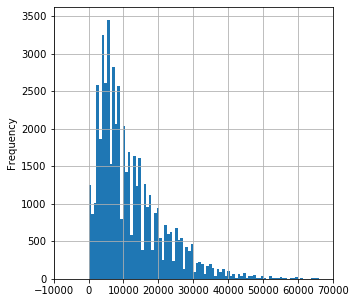

In [72]:
#plot histogram for the price column
data['price'].plot(kind='hist',bins=500,figsize=(5,5),grid = True)
plt.xlim(xmin=-10000, xmax = 70000)
plt.show()

On the histogram we see a big peak around price = 7000-10000. We can make a conclusion that the vast part of the ads are cars with lower price.

There a peak also around 0-1000. It's interesting because it is look like we have a lot of ads with zero price or close to zero. Let's zoom these section.

Here on the plot we can see a lot of ads with the price from 0 to 400. It's interesting what cars can cost so little? And cars with zero price - it might be a mistake or car owners want to give it for free?

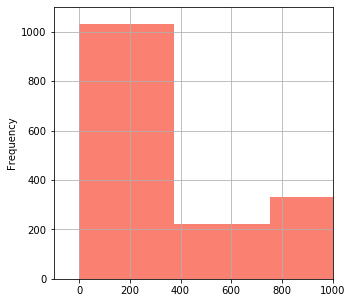

In [73]:
#histogram for the 'price' column with prices in range from 0 to 1000
data['price'].plot(kind='hist',bins=1000,figsize=(5,5),grid=True,color="salmon")
plt.xlim(xmin=-100, xmax = 1000)
plt.ylim(ymin=0, ymax = 1100)
plt.show()

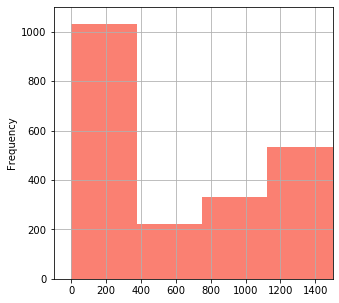

In [74]:
#histogram for the 'price' column with prices in range from 0 to 1000
data['price'].plot(kind='hist',bins=1000,figsize=(5,5),grid=True,color="salmon")
plt.xlim(xmin=-100, xmax = 1500)
plt.ylim(ymin=0, ymax = 1100)
plt.show()

Analyzing two histograms we see that plot starts to grow around x = 800. And if take a look on overall histogram of the whole column price we see that we have a peak around zero, than a small plato or dip between zero and 5000. And than plot only grows until he reaches the max hight around x = 7000-8000.

While zooming the x range from 0 to 1000 we see that grow is starting after x = 800. Meanwhile from x = 400 until x = 800 we see the plateau which can be the left low side of Gaussian bell. So let's create a data slice with prices that less than 400 to study it more closely.

In [75]:
#Let's check if we have 0 price (peak around zero on a histogram)
data[data['price'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,odometer_filled,date_posted_datetime,day_of_the_week,month_ad,year_ad,vehicle_age,vehicle_age_filled,average_mileage,average_mileage_filled,condition_numeric


In [76]:
data_small_price = data.query('price < 400')

We see in descriptive stats of the dataset with lowest prices that we have a lot of data with price equal to 1.0 because even 75% of this small dataset contain such price (length of these slice is 1041 rows).

In [77]:
data_small_price.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,model_year_filled,odometer_filled,day_of_the_week,month_ad,year_ad,vehicle_age,vehicle_age_filled,average_mileage,average_mileage_filled,condition_numeric
count,1041.000000,975.000000,1041.000000,870.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,975.000000,1041.000000,814.000000,1041.000000,1041.000000
mean,47.347743,2014.904615,7.095101,51061.390805,0.704131,38.954851,2014.662824,60576.083093,3.066282,6.682997,2018.308357,3.411282,3.645533,19696.343291,25424.854941,3.016330
std,97.936774,4.901717,2.272237,45731.309472,0.456652,27.877529,4.874842,47776.622416,2.048082,3.538985,0.462037,4.954213,4.919369,13781.178618,25758.046306,0.441504
min,1.000000,1966.000000,3.000000,0.000000,0.000000,1.000000,1966.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,2014.000000,6.000000,17976.000000,0.000000,18.000000,2014.000000,22700.000000,1.000000,3.000000,2018.000000,0.000000,0.000000,10322.375000,10406.222222,3.000000
50%,1.000000,2017.000000,6.000000,38860.000000,1.000000,33.000000,2016.000000,47139.000000,3.000000,7.000000,2018.000000,2.000000,2.000000,17269.000000,17921.200000,3.000000
75%,1.000000,2018.000000,10.000000,69153.000000,1.000000,53.000000,2018.000000,92945.000000,5.000000,10.000000,2019.000000,4.000000,5.000000,26152.000000,30981.666667,3.000000
max,399.000000,2019.000000,10.000000,300000.000000,1.000000,213.000000,2019.000000,300000.000000,6.000000,12.000000,2019.000000,53.000000,53.000000,111751.000000,150000.000000,5.000000


In [78]:
#Let's study how many data with car price equal to 1 we have 
#describe method in the beginning showed that there are such prices equal to 1
len(data[data['price']==1.0])

798

In [79]:
#I doubt that such cars as for example chevrolet camaro or 2014 (row 405) can cost 1.0 there is a mistake
data[data['price']==1.0].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,odometer_filled,date_posted_datetime,day_of_the_week,month_ad,year_ad,vehicle_age,vehicle_age_filled,average_mileage,average_mileage_filled,condition_numeric
405,1,2014,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,other,...,71310.0,2018-07-14,5,7,2018,4,4,17827.500000,17827.500000,3
3063,1,1998,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,other,...,164000.0,2018-10-11,3,10,2018,20,20,8200.000000,8200.000000,2
3808,1,2007,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,...,200.0,2019-03-18,0,3,2019,12,12,16.666667,16.666667,2
3902,1,1996,ford f-150,fair,8.0,gas,163000.0,manual,truck,white,...,163000.0,2019-02-23,5,2,2019,23,23,7086.956522,7086.956522,1
4140,1,2004,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,other,...,83000.0,2019-02-04,0,2,2019,15,15,5533.333333,5533.333333,3


I think these values with price equal to 1.0 a mistake or outlier. The data slice with price less than 400 contain only 1041 rows or represents 2% of data. So I think we can easily remove these rows. Let's plot the histogram for the dataset with excluded these 1041 rows.

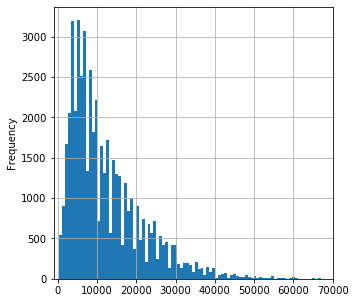

In [80]:
#histogram for the dataset with excluded 1041 rows with price less than 400
data_filtered = data.query('price >= 400')
data_filtered['price'].plot(kind='hist',bins=500,figsize=(5,5),grid=True)
plt.xlim(xmin=-1000, xmax = 70000)
plt.show()

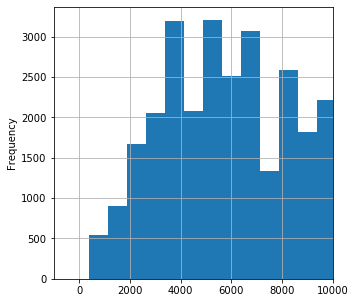

In [81]:
#zoom histogram for filtered data for the price range from 0 to 10000
data_filtered['price'].plot(kind='hist',bins=500,figsize=(5,5),grid=True)
plt.xlim(xmin=-1000, xmax = 10000)
plt.show()

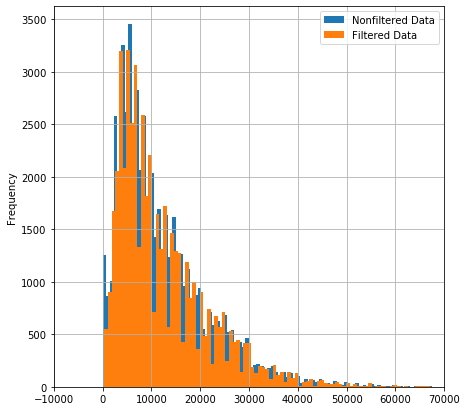

In [82]:
data['price'].plot(kind='hist',bins=500,figsize=(7,7),grid=True,label='Nonfiltered Data')
data_filtered['price'].plot(kind='hist',bins=500,figsize=(7,7),grid=True,label='Filtered Data')
plt.legend(loc=0)
plt.xlim(xmin=-10000, xmax = 70000)
plt.show()

<div class="alert alert-block alert-info">
<b>Improve: </b> It's better to use "alpha" parameter when 2 historgrams are in one plot.
</div>

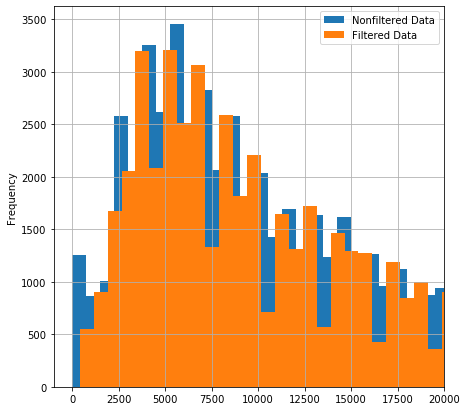

In [83]:
data['price'].plot(kind='hist',bins=500,figsize=(7,7),grid=True,label='Nonfiltered Data')
data_filtered['price'].plot(kind='hist',bins=500,figsize=(7,7),grid=True,label='Filtered Data')
plt.legend(loc=0)
plt.xlim(xmin=-1000, xmax = 20000)
plt.show()

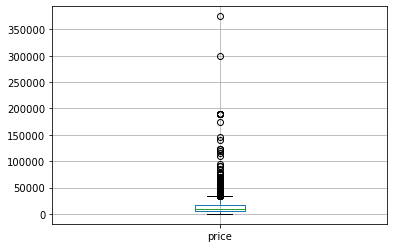

In [84]:
#Let's plot a boxplot to find outliers in the data
data.boxplot(column = 'price')
#plt.ylim(0,100000)
plt.show()

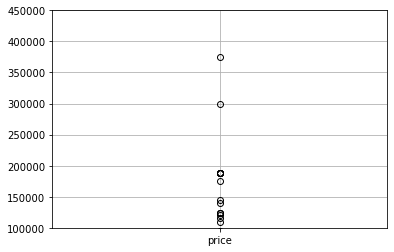

In [85]:
data.boxplot(column = 'price')
plt.ylim(100000,450000)
plt.show()

On boxplots we see that there are some outliers, some as great as 300000. Let's remove data with prices more than 300K and update data_filtered dataset.

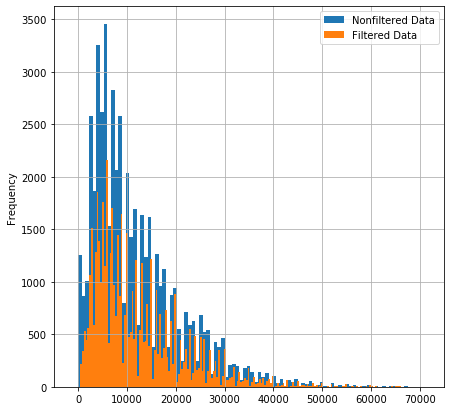

In [86]:
data_filtered_ = data_filtered.query('price < 300000')
data_filtered = data_filtered_

data['price'].plot(kind='hist',bins=500,figsize=(7,7),grid=True,label='Nonfiltered Data')
data_filtered['price'].plot(kind='hist',bins=500,figsize=(7,7),grid=True,label='Filtered Data')
plt.legend(loc=0)
plt.xlim(xmin=-5000, xmax = 75000)
plt.show()

So we filtered price column, after deleting cars with too high prices plot changed a lot. 

I excluded from original dataset entries with price less than 400 and entries with prices more than 300K. The plot has changed but we can see that the main features and distribution of the histogram are the same. We still have the peak where car price are in the limits from 2500 till 10000. So a lot of cars has a price in this range.

**Let's study the vehicle's age when the ad was placed.**
For that I will use 'vehicle_age' and 'vehicle_age_filled' columns.

In [87]:
data_filtered[['vehicle_age','vehicle_age_filled']].describe()

,vehicle_age,vehicle_age_filled
count,46895.000000,50441.000000
mean,8.666148,8.616859
std,6.277108,6.096039
min,0.000000,0.000000
25%,4.000000,4.000000
50%,8.000000,8.000000
75%,12.000000,12.000000
max,110.000000,110.000000


If looking at stats from describe() method - I don't see the big difference between two columns.
The difference between two columns are:
1) medians different by the value 1 year 

2) the original 'vehicle_age' contain a lot of missing values, when in 'vehicle_age_filled' column was built with the help of columns with filled NaNs so it do not contain NaNs.

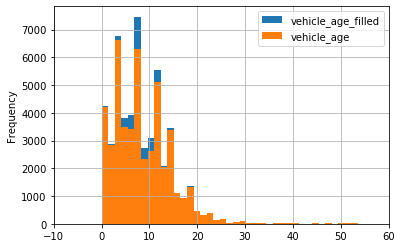

In [88]:
#two histograms - one for 'vehicle_age' column and one for 'vehicle_age_filled' compared to see difference
data[['vehicle_age_filled','vehicle_age']].plot.hist(bins=80,alpha=1,grid=True)
plt.xlim(xmin=-10, xmax = 60)
plt.show()

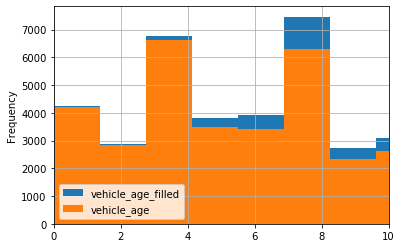

In [89]:
#two histograms - one for 'vehicle_age' column and one for 'vehicle_age_filled' compared to see difference
data[['vehicle_age_filled','vehicle_age']].plot.hist(bins=80,alpha=1,grid=True)
plt.legend(loc='lower left')
plt.xlim(xmin=0, xmax = 10)
plt.show()

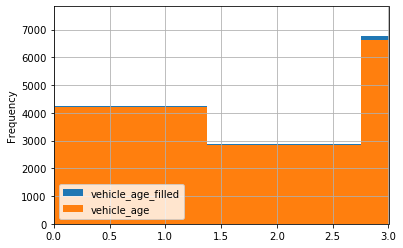

In [90]:
#two histograms - one for 'vehicle_age' column and one for 'vehicle_age_filled' compared to see difference
data[['vehicle_age_filled','vehicle_age']].plot.hist(bins=80,alpha=1,grid=True)
plt.legend(loc='lower left')
plt.xlim(xmin=0, xmax = 3)
plt.show()

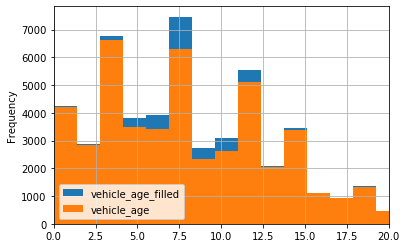

In [91]:
#two histograms - one for 'vehicle_age' column and one for 'vehicle_age_filled' compared to see difference
data[['vehicle_age_filled','vehicle_age']].plot.hist(bins=80,alpha=1,grid=True)
plt.legend(loc='lower left')
plt.xlim(xmin=0, xmax = 20)
plt.show()

We see that the most of the cars have age around 3.5-4 years and 7-8 years. We also have a lots of new cars with age 0-1.5 years and we have peak around 11-12 years. After x equal to 15 years the number of cars for sale is decreasing.

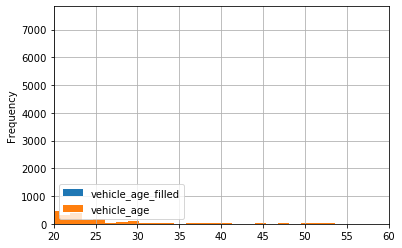

In [92]:
#Let's see on the tail of the histogram
data[['vehicle_age_filled','vehicle_age']].plot.hist(bins=80,alpha=1,grid=True)
plt.legend(loc='lower left')
plt.xlim(xmin=20, xmax = 60)
#plt.ylim(ymin=0, ymax = 1000)
plt.show()

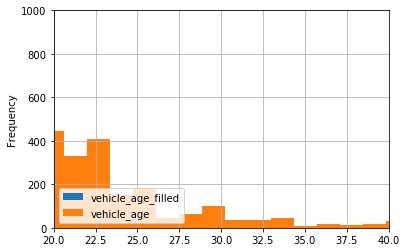

In [93]:
data[['vehicle_age_filled','vehicle_age']].plot.hist(bins=80,alpha=1,grid=True)
plt.legend(loc='lower left')
plt.xlim(xmin=20, xmax = 40)
plt.ylim(ymin=0, ymax = 1000)
plt.show()

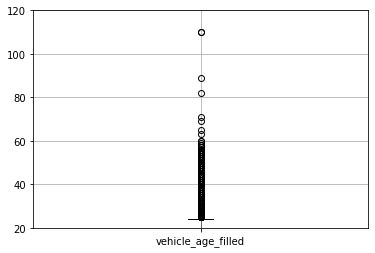

In [94]:
data.boxplot(column = 'vehicle_age_filled')
plt.ylim(20,120)
plt.show()

I think we can filter cars of age more than 30 years. On the histogram we see than there are too few cars with such a long age. We even have cars with age more than 100 years.

Let's update our filtered dataset and exclude from it entries with vehicle_age more than 30 years.
We can use for that any of our vehicle age columns: 'vehicle_age_filled' or 'vehicle_age' because here those columns are the same.

In [95]:
data_filtered_ = data_filtered.query('vehicle_age_filled < 30')
data_filtered = data_filtered_
#data_filtered

Now we see that we don't have this long tail the a histogram after vehicle age more than 30

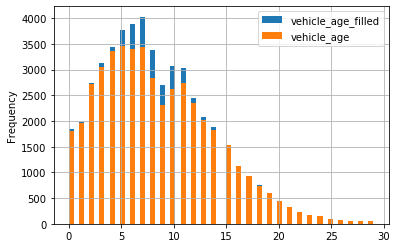

In [96]:
data_filtered[['vehicle_age_filled','vehicle_age']].plot.hist(bins=60,alpha=1,grid=True,label='filtered data')
#plt.xlim(xmin=-10, xmax = 0)
plt.show()

Let's see on a plot the changes between original dataset and filtered one.

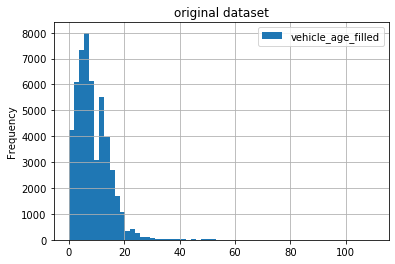

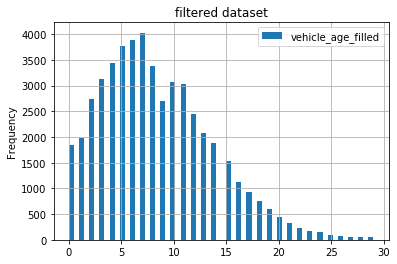

In [97]:
#original dataset
data[['vehicle_age_filled']].plot.hist(bins=60,alpha=1,grid=True,title='original dataset')
#filtered dataset
data_filtered[['vehicle_age_filled']].plot.hist(bins=60,alpha=1,grid=True,title='filtered dataset')
#plt.xlim(xmin=-10, xmax = 0)
plt.show()

So we see on histograms that we don't have now a long tail of values after x=30.

**Let's study mileage or 'odometer' column now.**

We have here also to study original 'odometer' with NaNs and 'odometer_filled' column with filled NaNs.

In [98]:
data_filtered[['odometer','odometer_filled']].describe()

,odometer,odometer_filled
count,42422.000000,50047.000000
mean,117130.665103,116706.708444
std,64530.732796,60132.590545
min,0.000000,0.000000
25%,72935.000000,79485.000000
50%,114673.000000,117000.000000
75%,156000.000000,149105.000000
max,990000.000000,990000.000000


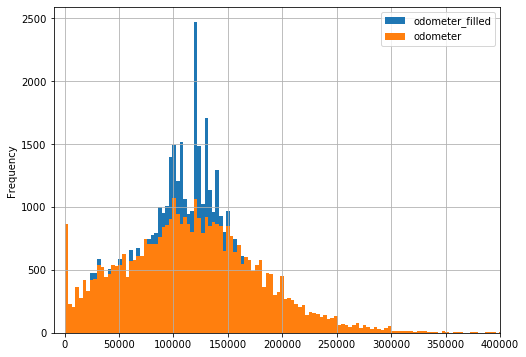

In [99]:
#two histograms - one for 'odometer_filled' column and one for 'odometer' compared to see difference
data_filtered[['odometer_filled','odometer']].plot.hist(bins=300,alpha=1,grid=True,figsize=(8,6))
plt.xlim(xmin=-10000, xmax = 400100)
plt.show()

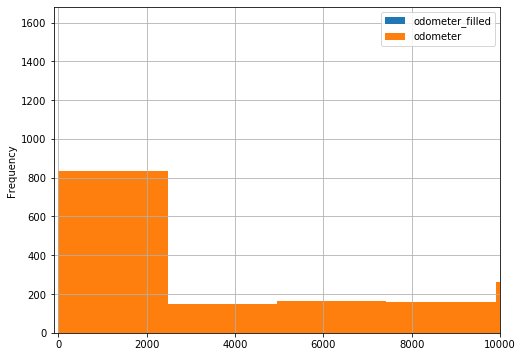

In [100]:
#Let's zoom peak about zero mileage
data_filtered[['odometer_filled','odometer']].plot.hist(bins=400,alpha=1,grid=True,figsize=(8,6))
plt.xlim(xmin=-100, xmax = 10000)
plt.show()

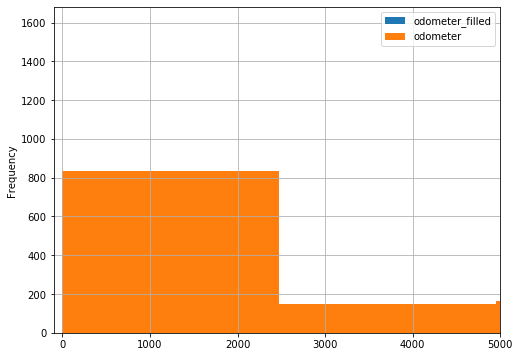

In [101]:
#Let's zoom peak about zero mileage
data_filtered[['odometer_filled','odometer']].plot.hist(bins=400,alpha=1,grid=True,figsize=(8,6))
plt.xlim(xmin=-100, xmax = 5000)
plt.show()

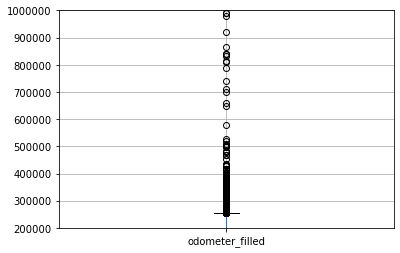

In [102]:
data.boxplot(column = 'odometer_filled')
plt.ylim(200000,1000000)
plt.show()

While working with 'odometer' column to identify there missing values. We got 7892 rows with empty entries about car's mileage. This is 15,31% of database. I replaced these values with median value. 

We see on the picture above that replaced value (blue colour) have a big peak around mileage 125000. We also have peaks around mileage 100K and 140K. I think here located these missing values which I replaced by median value.

We also have a peak around zero mileage till x=2500. A lot of new cars were placed for sale.

As was with previous parameter vehicle age, we have here on a histogram a tail (after x more than 300K) caused by values with the biggest mileage. In these values 'odometer' column is the same as 'odometer_filled' column so we easily can use one of them for the filter. Let's remove those values.

In [103]:
data_filtered_new = data_filtered.query('odometer_filled < 300000')

Let's compare data about mileage from original dataset and from filtered one, where we removed data of mileage more than 300K

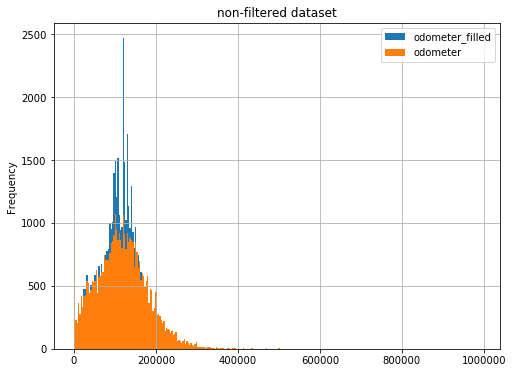

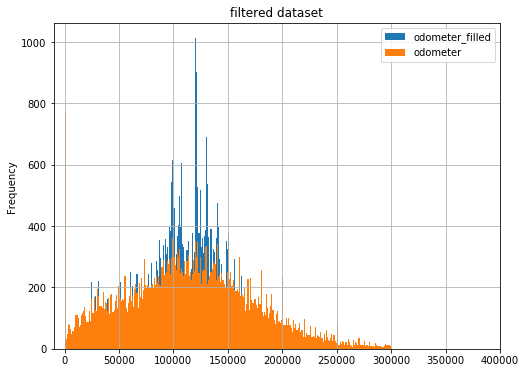

In [104]:
data_filtered[['odometer_filled','odometer']].plot.hist(bins=300,alpha=1,grid=True,figsize=(8,6),title='non-filtered dataset')
data_filtered_new[['odometer_filled','odometer']].plot.hist(bins=300,alpha=1,grid=True,figsize=(8,6),title='filtered dataset')
plt.xlim(xmin=-10000, xmax = 400100)
plt.show()

We see that now we don't have such a long tail with quite rare values of mileage which we had before.
We still have peaks about 100K and 125K but we know that this is missing values replaces by median. 

In [105]:
#I made filtering into data_filtered_new dataframe
#Let's replace data_filtered with data_filtered_new
data_filtered = data_filtered_new

**Let's study number of cylinders.**

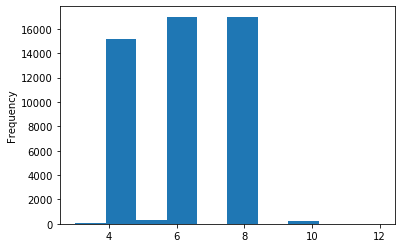

In [106]:
data_filtered['cylinders'].plot(kind='hist')
plt.show()

In [107]:
cylinders = data_filtered['cylinders'].value_counts()

frame = { 'Number_of_cylinders': cylinders.index, 'Number_of_cars': cylinders }
cylinders_data = pd.DataFrame(frame)

In [108]:
cylinders_data['share'] =  cylinders_data['Number_of_cars']/ cylinders_data['Number_of_cars'].sum()
cylinders_data

,Number_of_cylinders,Number_of_cars,share
8.0,8.0,16990,0.341556
6.0,6.0,16981,0.341375
4.0,4.0,15193,0.305430
5.0,5.0,293,0.005890
10.0,10.0,251,0.005046
3.0,3.0,33,0.000663
12.0,12.0,2,0.000040


The most of the cars have 8.0,6.0 and 4.0 cylinders. Only two cars among all ads had 12.0 cylinders. relatively small number of cars have 10.0, 5.0	 and 3.0 cylinders. We don't have outliers here, so there is nothing to filter.

**Let's study condition column**

In [109]:
condition = data_filtered['condition'].value_counts()
cond_frame =  { 'condition': condition.index, 'Number_of_cars': condition }
#I create here new dataframe from the value_counts table
condition_data = pd.DataFrame(cond_frame)
condition_data['Share'] = condition_data['Number_of_cars'] / condition_data['Number_of_cars'].sum()
condition_data

,condition,Number_of_cars,Share
excellent,excellent,23622,0.474881
good,good,19765,0.397342
like new,like new,4635,0.093179
fair,fair,1480,0.029753
new,new,132,0.002654
salvage,salvage,109,0.002191


In [110]:
#sum of shares of the first two most common conditions - excellnt and good
print(condition_data['Share'][:2].sum())
#sum of shares of all other car conditions: like new, fair, new and salvage
print(condition_data['Share'][2:].sum())

0.8722232273887783
0.12777677261122167


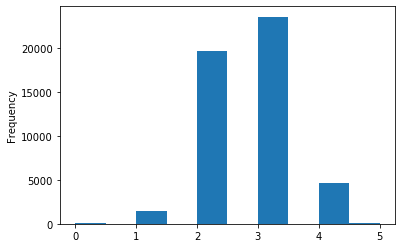

In [111]:
data_filtered['condition_numeric'].plot(kind='hist')
plt.show()

Mostly we have ads with cars of excellent and good conditions - 87,22% of all car ads.
The other conditions encounter in 12,77% of all other cases.

Here is also nothing to filter.

### Intermediate Conclusion

I plot histograms for the main parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. I determined the outliers and filtered them from the original dataset. 

Was filtered following entries:
- Cars with price less than 400
- Cars with price more than 300K
- Cars with age more than 30
- Cars with odometer more than 300000 

I plot the histogram to show the difference between original dataset and filtered one.

**Study how many days advertisements were displayed ( days_listed )**. Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

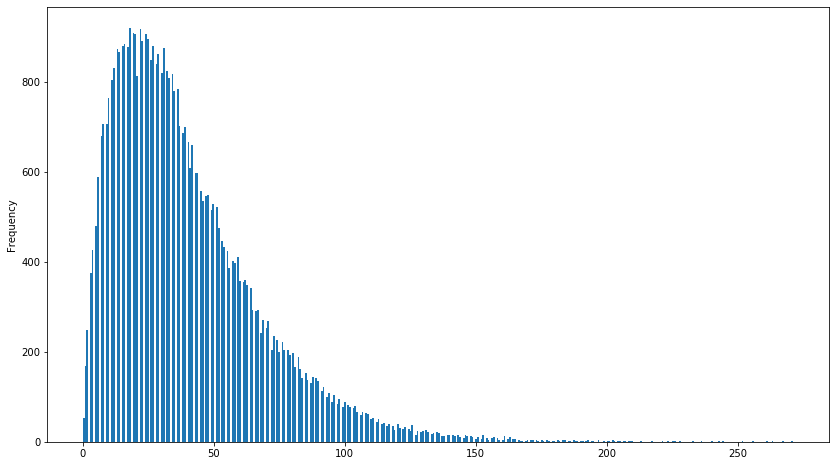

In [112]:
#First of all let's plot a histogram of 'days_listed' column
data_filtered['days_listed'].plot(kind='hist',bins=400,figsize=(14,8))
plt.show()

<div class="alert alert-block alert-info">
<b>Improve: </b> We can see gaps at the grapg because bins parameter is too big. It's better to use ~100 in this case
</div>

Here we can see that the histogram has skewed a little. Nonetheless it looks like skewed bell of normal disctribution plot. 

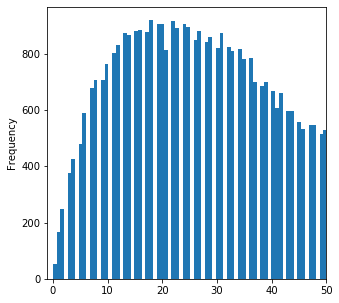

In [113]:
#Here zoom the peak of the histogram
data_filtered['days_listed'].plot(kind='hist',bins=400,figsize=(5,5))
plt.xlim(xmin=-1, xmax = 50)
plt.show()

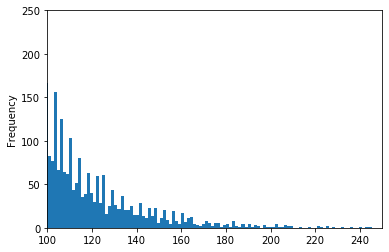

In [114]:
#the tail of the histogram
data_filtered['days_listed'].plot(kind='hist',bins=200)
plt.xlim(xmin=100, xmax = 250)
plt.ylim(ymin=0, ymax = 250)
plt.show()

In [115]:
#Let's look on statistics
data_filtered['days_listed'].describe()

count    49743.000000
mean        39.555033
std         28.216255
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [116]:
len(data_filtered[data_filtered['days_listed']==0])

52

Median time which ads was showed is 33 days. A litle more than a month. Not so bad.
Average time which ads was showed is 39 days. A litle bit more than median.
Only 52 ads vere deleted from the website in the same day it's very small number in comparison with the size of the data.

In [117]:
data_filtered['day_of_the_week'].value_counts().sort_values(ascending=False)

3    7261
5    7118
4    7087
0    7078
1    7071
6    7069
2    7059
Name: day_of_the_week, dtype: int64

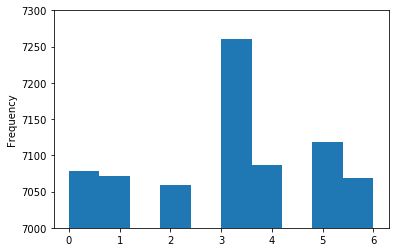

In [118]:
data_filtered['day_of_the_week'].plot(kind='hist')
plt.ylim(ymin=7000, ymax = 7300)
plt.show()

In [119]:
#percentage of ads published in Thursdays to the all number of ads
7261 / data_filtered['day_of_the_week'].count()*100

14.597028727660174

In [120]:
#percentage of ads published in Wednesdays to the all number of ads
7059 / data_filtered['day_of_the_week'].count()*100

14.19094143899644

In [121]:
data_filtered['month_ad'].value_counts().sort_values(ascending=False)

10    4469
12    4401
3     4395
5     4346
7     4331
8     4330
9     4313
1     4290
11    4220
6     4068
2     3863
4     2717
Name: month_ad, dtype: int64

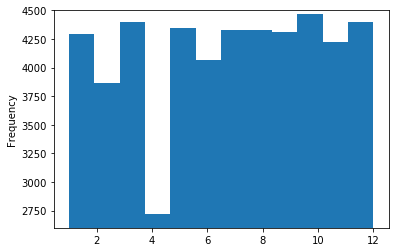

In [122]:
data_filtered['month_ad'].plot(kind='hist',bins=12)
plt.ylim(ymin=2600, ymax = 4500)
plt.show()

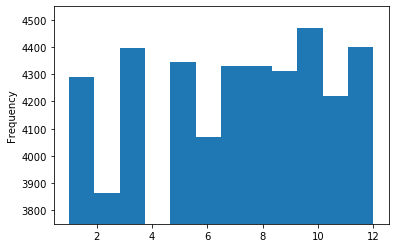

In [123]:
data_filtered['month_ad'].plot(kind='hist',bins=12)
plt.ylim(ymin=3750, ymax = 4550)
plt.show()

In [124]:
#smallest number of ads in April in percentage to all number of ads
2717 / data_filtered['month_ad'].count()*100

5.462075065838409

In [125]:
#next after smallest number of ads in Februar in percentage to all number of ads
3863 / data_filtered['month_ad'].count()*100

7.765916812415817

In [126]:
#biggest number of ads in October in percentage to all number of ads
4469 / data_filtered['month_ad'].count()*100

8.984178678407012

In [127]:
#next after biggest number of ads in December in percentage to all number of ads
4401 / data_filtered['month_ad'].count()*100

8.847476026777636

In [128]:
data_filtered['year_ad'].value_counts()

2018    34478
2019    15265
Name: year_ad, dtype: int64

In [129]:
#percentage of ads published in 2018 to the all number of ads
34478 / data_filtered['year_ad'].count()*100

69.3122650423175

Looking on stats above and histograms I can make following conclusions about parameter how many days advertisements were displayed (days_listed):

- The biggest number of car ads were published in Thursdays - 14.59%
- The smallest number of car ads were published in  Wednesdays- 14.19%
- Nevertheless among days of the week ads were published almost evenly we see that in different between percentages of the smallest number and biggest number (this is not a big difference between 14.59% - 14.19% = 0,4%) is not so big and distribution overa week days on a histogram too. 

- The biggest number of car ads were published in October and December - 8.98% and 8.84% accordingly
- The smallest number of car ads were published in April and Februar - 5.46% and 7,76%
- Among other months car ads were published quite evenly

- 69,31 % of ads were published in 2018

**Let's look more closer on the ads showed on the website from 0 until 25 days** (approximately on x=25 the main curve of histogram for 'days_listed' reaches the plateau and than starts to go down)

In [130]:
#slice of the dataset with lifetime ad less than 25 days
less_25_days = data_filtered.query('days_listed < 25')

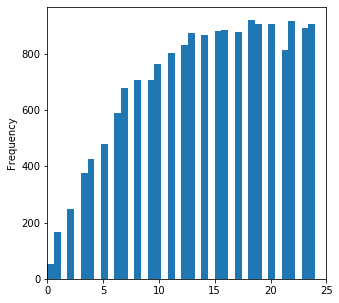

In [131]:
less_25_days['days_listed'].plot(kind='hist',bins=40,figsize=(5,5))
plt.xlim(xmin=0, xmax = 25)
plt.show()

In [132]:
less_25_days.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,model_year_filled,odometer_filled,day_of_the_week,month_ad,year_ad,vehicle_age,vehicle_age_filled,average_mileage,average_mileage_filled,condition_numeric
count,17461.000000,16224.000000,17461.000000,14675.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,17461.000000,16224.000000,17461.000000,13617.000000,17461.000000,17461.000000
mean,12351.761010,2009.972510,6.078289,115079.157751,0.490293,14.298207,2010.004295,115016.592721,2.992898,6.673673,2018.302846,8.331546,8.298551,18038.814669,18935.062183,2.638566
std,9563.591646,5.465293,1.638944,60712.606584,0.499920,6.243137,5.316256,56469.826611,2.000131,3.487718,0.459502,5.482848,5.334550,12922.741179,16012.453043,0.720108
min,400.000000,1989.000000,3.000000,0.000000,0.000000,0.000000,1989.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5495.000000,2006.000000,4.000000,71625.000000,0.000000,9.000000,2007.000000,79000.000000,1.000000,3.000000,2018.000000,4.000000,4.000000,10700.000000,10571.222222,2.000000
50%,9500.000000,2011.000000,6.000000,113517.000000,0.000000,15.000000,2011.000000,116400.000000,3.000000,7.000000,2018.000000,7.000000,7.000000,15077.142857,15076.923077,3.000000
75%,16995.000000,2014.000000,8.000000,155000.000000,1.000000,20.000000,2014.000000,148000.000000,5.000000,10.000000,2019.000000,12.000000,12.000000,21502.500000,21786.600000,3.000000
max,189000.000000,2019.000000,12.000000,299999.000000,1.000000,24.000000,2019.000000,299999.000000,6.000000,12.000000,2019.000000,29.000000,29.000000,164409.000000,164409.000000,5.000000


In [133]:
less_25_days['type'].value_counts()

sedan          4178
SUV            4177
truck          4171
pickup         2397
coupe           726
wagon           532
mini-van        410
hatchback       356
van             198
convertible     141
other            88
offroad          81
bus               6
Name: type, dtype: int64

In [134]:
less_25_days['cylinders'].value_counts()

8.0     5973
6.0     5899
4.0     5395
5.0      104
10.0      81
3.0        7
12.0       2
Name: cylinders, dtype: int64

In [135]:
less_25_days['transmission'].value_counts()

automatic    15980
manual         926
other          555
Name: transmission, dtype: int64

In [136]:
less_25_days['paint_color'].value_counts().head(5)

white     3425
other     3179
black     2559
silver    2132
grey      1722
Name: paint_color, dtype: int64

In [137]:
less_25_days['is_4wd'].value_counts()

0.0    8900
1.0    8561
Name: is_4wd, dtype: int64

We see here that ads with lifetime less than 25 days has the average lifetime of 14 days.  
Average price for such cars is 12351 while median price is 9500.
Average model year is 2009, median model year is 2011.
This is mostly cars of sedan, SUV and truck types.
Mostly with 8.0, 6.0 and 4.0 cylinders.
Almost all of them have automatic transmission.
The most popular colour is white.
The biggest half of them isn't 4wd.

In [138]:
less_25_days['day_of_the_week'].value_counts().sort_values(ascending=False)

0    2540
5    2534
3    2515
4    2487
2    2471
1    2466
6    2448
Name: day_of_the_week, dtype: int64

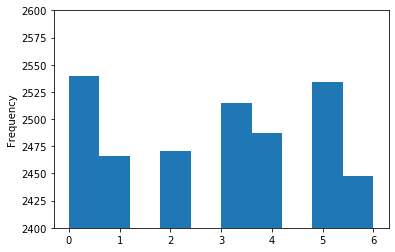

In [139]:
less_25_days['day_of_the_week'].plot(kind='hist')
plt.ylim(ymin=2400, ymax = 2600)
plt.show()

In [140]:
less_25_days['month_ad'].value_counts()

10    1605
12    1592
7     1544
1     1522
11    1518
9     1502
8     1494
3     1493
5     1492
6     1426
2     1355
4      918
Name: month_ad, dtype: int64

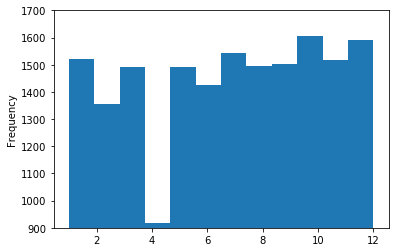

In [141]:
less_25_days['month_ad'].plot(kind='hist',bins=12)
plt.ylim(ymin=900, ymax = 1700)
plt.show()

In [142]:
#percentage of ads published in October to the all number of ads
1605 / less_25_days['month_ad'].count()*100

9.191913407021362

In [143]:
#percentage of ads published in April to the all number of ads
918 / less_25_days['month_ad'].count()*100

5.257430845885115

In [144]:
less_25_days['year_ad'].value_counts()

2018    12173
2019     5288
Name: year_ad, dtype: int64

In [145]:
#percentage of ads published in 2018 to the all number of ads
12173 /  less_25_days['year_ad'].count()*100

69.71536567206918

Looking on stats above and histograms I can make following conclusions for ads which were listed on a website short time (25 days and less):

- Among days of the week ads were published almost evenly
- The biggest number of car ads were published in October  - 9,19% 
- The smallest number of car ads were published in April - 5,25%
- Among other months car ads were published quite evenly
- 69,71 % of ads were published in 2018

**Let's analyze ads which were published abmormally long time**

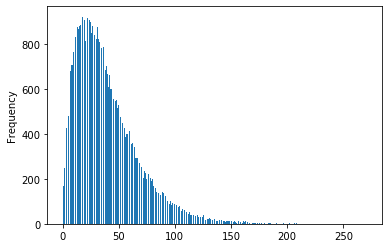

In [146]:
#Start from defining what will "abmormally long time" mean
#the main histogram which we already saw
data_filtered['days_listed'].plot(kind='hist',bins=400)
plt.show()

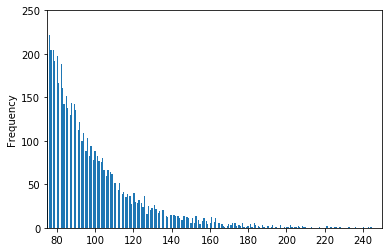

In [147]:
#Let's plot the tail of the histogram
data_filtered['days_listed'].plot(kind='hist',bins=400)
plt.xlim(75,250)
plt.ylim(0,250)
plt.show()

We see on the last histogram that after 120 days listed the numbers decreasing very fast. So let's consider ads listed 120 days and more as published abmormally long time. By the way 120 days is about 4 months.

In [148]:
#slice of the dataset with lifetime ad more than 120 days
more_120_days = data_filtered.query('days_listed > 120')

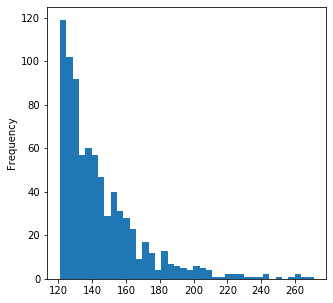

In [149]:
more_120_days['days_listed'].plot(kind='hist',bins=40,figsize=(5,5))
plt.show()

In [150]:
more_120_days.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,model_year_filled,odometer_filled,day_of_the_week,month_ad,year_ad,vehicle_age,vehicle_age_filled,average_mileage,average_mileage_filled,condition_numeric
count,796.000000,739.000000,796.000000,669.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,739.000000,796.000000,620.000000,796.000000,796.000000
mean,11812.043970,2009.489851,6.106784,119902.007474,0.482412,144.795226,2009.566583,118656.628141,2.944724,6.483668,2018.322864,8.833559,8.756281,17477.489233,18221.542158,2.629397
std,9215.428952,5.538566,1.637579,59486.112795,0.500005,24.426855,5.369547,55413.755347,1.994195,3.495332,0.467865,5.537324,5.370162,11435.073948,14938.090573,0.676350
min,700.000000,1989.000000,3.000000,0.000000,0.000000,121.000000,1989.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,2006.000000,4.000000,76000.000000,0.000000,128.000000,2006.000000,82742.000000,1.000000,3.000000,2018.000000,5.000000,5.000000,10647.500000,10181.363636,2.000000
50%,8998.500000,2010.000000,6.000000,119920.000000,0.000000,137.000000,2010.000000,119308.000000,3.000000,7.000000,2018.000000,8.000000,8.000000,15070.604167,14988.450000,3.000000
75%,15300.000000,2014.000000,8.000000,158054.000000,1.000000,154.000000,2013.000000,151751.000000,5.000000,9.250000,2019.000000,12.000000,12.000000,21118.444444,21340.750000,3.000000
max,61046.000000,2019.000000,10.000000,294223.000000,1.000000,271.000000,2019.000000,294223.000000,6.000000,12.000000,2019.000000,29.000000,29.000000,82676.000000,139147.500000,4.000000


In [151]:
more_120_days['type'].value_counts().head(5)

SUV       202
sedan     181
truck     176
pickup     96
coupe      39
Name: type, dtype: int64

In [152]:
more_120_days['cylinders'].value_counts().head(5)

8.0     280
6.0     268
4.0     240
5.0       4
10.0      3
Name: cylinders, dtype: int64

In [153]:
more_120_days['transmission'].value_counts().head(5)

automatic    736
manual        44
other         16
Name: transmission, dtype: int64

In [154]:
more_120_days['paint_color'].value_counts().head(5)

white     163
other     139
black     109
silver     93
grey       78
Name: paint_color, dtype: int64

In [155]:
more_120_days['is_4wd'].value_counts().head(5)

0.0    412
1.0    384
Name: is_4wd, dtype: int64

Analyzing slice of the dataset with parameter days_listed more than 120 days we see the following:

- Average lifetime for such cars is 144 days, median lifetime is 137 days
- Average price for such cars is 11812, while median price is 8998
- Average model year is 2009, median model year is 2010
- This is mostly cars of sedan, SUV and truck types. 
- Mostly with 8.0, 6.0 and 4.0 cylinders. 
- Also almost all of them have automatic transmission.
- The most popular colour is also white
- Mostly cars isn't 4wd 

In [156]:
more_120_days['day_of_the_week'].value_counts().sort_values(ascending=False)

1    130
5    120
3    118
0    111
2    110
6    106
4    101
Name: day_of_the_week, dtype: int64

In [157]:
#percentage of ads published on Tuesdays to the all number of ads
(130 / more_120_days['day_of_the_week'].count()) * 100

16.331658291457288

In [158]:
#percentage of ads published on Saturdays to the all number of ads
(120 / more_120_days['day_of_the_week'].count()) * 100

15.07537688442211

In [159]:
#percentage of ads published on Fridays to the all number of ads
(101 / more_120_days['day_of_the_week'].count()) * 100

12.688442211055277

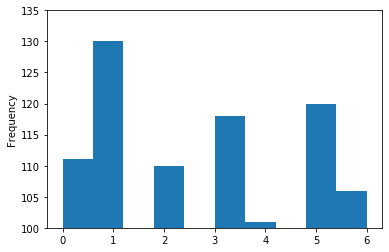

In [160]:
more_120_days['day_of_the_week'].plot(kind='hist')
plt.ylim(ymin=100, ymax = 135)
plt.show()

In [161]:
more_120_days['month_ad'].value_counts()

2     82
11    77
9     77
5     75
3     69
7     67
1     66
6     65
12    61
10    61
8     56
4     40
Name: month_ad, dtype: int64

In [162]:
#percentage of ads published in Februar to the all number of ads
(82 / more_120_days['month_ad'].count()) * 100

10.301507537688442

In [163]:
#percentage of ads published in April to the all number of ads
(40 / more_120_days['month_ad'].count()) * 100

5.025125628140704

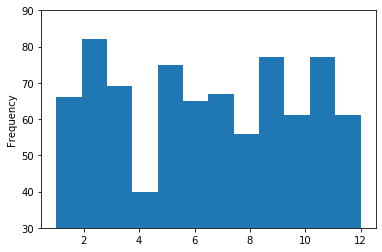

In [164]:
more_120_days['month_ad'].plot(kind='hist',bins=12)
plt.ylim(ymin=30, ymax = 90)
plt.show()

In [165]:
more_120_days['year_ad'].value_counts()

2018    539
2019    257
Name: year_ad, dtype: int64

In [166]:
539 / (more_120_days['year_ad'].count()) * 100

67.71356783919597

Looking on stats above and histograms I can make following conclusions for ads which were listed on a website more than 120 days:

- Among days of the week ads were published almost evenly
- The biggest number of car ads were published in Tuesdays - 16,33% and Saturdays - 15,07%
- The smallest number of car ads were published in Fridays - 12,68%

- The biggest number of car ads were published in Februar - 10,2%
- The smallest number of car ads were published in April - 5,02%
- Among other months car ads were published quite evenly
- 69,71 % of ads were published in 2018

**Let's analyze the number of ads and the average price for each type of vehicle.**

Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. 

In [167]:
type_price = data_filtered.pivot_table(index='type',values='price',aggfunc=['mean','count'])
type_price.columns = ['avg_price','count']
type_price['type'] = type_price.index
type_price.sort_values('count',ascending=False)

,avg_price,count,type
type,,,
SUV,11453.287078,12049,SUV
truck,17287.244371,11859,truck
sedan,7123.047076,11832,sedan
pickup,16210.856182,6842,pickup
coupe,14801.337555,2053,coupe
wagon,9198.046205,1515,wagon
mini-van,8220.161905,1155,mini-van
hatchback,6940.979146,1007,hatchback
van,9240.968198,566,van


In [168]:
type_price.sort_values('avg_price',ascending=False)

,avg_price,count,type
type,,,
truck,17287.244371,11859,truck
bus,17135.666667,24,bus
pickup,16210.856182,6842,pickup
coupe,14801.337555,2053,coupe
offroad,14629.932692,208,offroad
convertible,14053.878238,386,convertible
SUV,11453.287078,12049,SUV
other,10815.651822,247,other
van,9240.968198,566,van


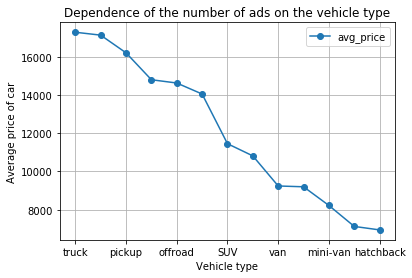

In [169]:
#Plot showing dependece of the average price for each type of vehicle
type_price.sort_values(by='avg_price',ascending=False).plot(x='type',y='avg_price',style='o-',grid=True,title='Dependence of the number of ads on the vehicle type')
plt.ylabel('Average price of car')
plt.xlabel('Vehicle type')
plt.show()

The most expensive cars are following types: 
- truck with average price of 17287
- bus with average price of 17135
- pickup with average price of 16210
- The most cheap cars are hatchbacks with average price of 6940.

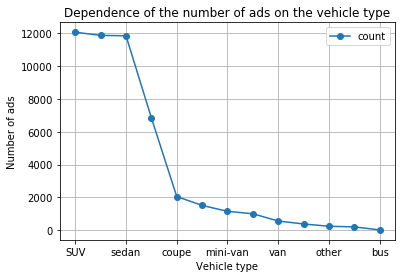

In [170]:
#Plot showing dependece of the number of ads for each type of vehicle

type_price.sort_values(by='count',ascending=False).plot(x='type',y='count',style='o-',grid=True,title='Dependence of the number of ads on the vehicle type')
plt.ylabel('Number of ads')
plt.xlabel('Vehicle type')
plt.show()

The greatest number of ads have two types of cars: 
- SUV (aka sport utility vehicle) and truck. 
- The next car type by the number of ads (very close to the main two groups) is sedan. 
- The smallest number of ads have buses.

**What factors impact the price most?** Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

Let's study whether the price depends on age, mileage, condition, transmission type, and color for SUV, truck and sedan cars.

In [171]:
#Let's create a data slice with required for analysis columns
data_factors = data_filtered[['price','vehicle_age_filled','average_mileage_filled','condition_numeric','transmission','paint_color','type']]


In [172]:
#data slices with rows for car type = SUV
SUV = data_factors.query('type == "SUV"')
#data slices with rows for car type = truck
truck = data_factors.query('type == "truck"')
#data slices with rows for car type = sedan
sedan = data_factors.query('type == "sedan"')

#list of dataframes
types = [SUV, truck, sedan]
#concat those dataframes into one dataframe
df_types = pd.concat(types)
df_types

,price,vehicle_age_filled,average_mileage_filled,condition_numeric,transmission,paint_color,type
0,9400,7,20714.285714,2,automatic,other,SUV
7,15990,6,18245.500000,3,automatic,black,SUV
8,11500,6,17362.333333,3,automatic,other,SUV
9,9200,11,13381.000000,3,automatic,blue,SUV
14,12990,10,13228.500000,3,automatic,black,SUV
...,...,...,...,...,...,...,...
51520,9249,5,17627.200000,4,automatic,black,sedan
51521,2700,16,11343.750000,0,automatic,white,sedan
51522,3950,9,14222.222222,3,automatic,blue,sedan
51523,7455,5,27914.600000,2,automatic,black,sedan


In [173]:
#Newly created dataframe looks correct 
df_types['type'].value_counts()

#Here I checked that the number of each type value is the same as was in the original dataset

#data_factors[data_factors['type']=='SUV'].count()
#data_factors[data_factors['type']=='truck'].count()
#data_factors[data_factors['type']=='sedan'].count()

SUV      12049
truck    11859
sedan    11832
Name: type, dtype: int64

Let's plot scatter plot for pairs price - parameter for each car type.

Among parameters will be: 'average_mileage_filled','condition_numeric','vehicle_age_filled'

In [174]:
#function to print plots of dependencies between car price and one of parameter
car_type = ['SUV','truck','sedan']
#parameters = ['average_mileage_filled','condition_numeric','vehicle_age_filled']

def depend_param (data,cartype,parameters):
    for types in cartype:
        for param in parameters:
            print( data.query('type == @types').plot(x=param,y='price',kind='scatter',alpha=0.03,title=types)  )
            plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


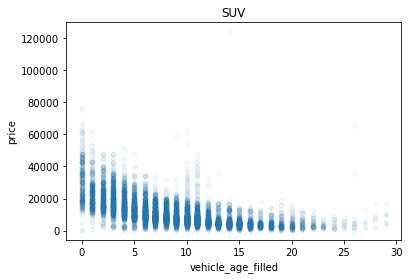

AxesSubplot(0.125,0.125;0.775x0.755)


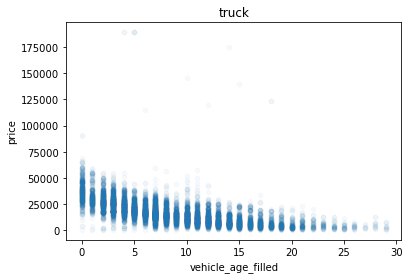

AxesSubplot(0.125,0.125;0.775x0.755)


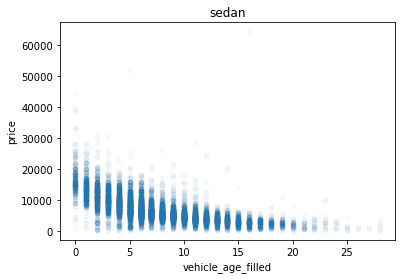

In [175]:
#Let's run this function for vehicle age parameter
parameters = ['vehicle_age_filled']
depend_param(df_types,car_type,parameters)

Looking on these plots we can say than the more the vehicle age the less is price.  We see the downtrend for each type of cars: SUV, truck and sedan.

The cars with zero age have the highest prices. There are some high price values for cars of not 0-2 age but I assume it might be some luxuary car brands.

AxesSubplot(0.125,0.125;0.775x0.755)


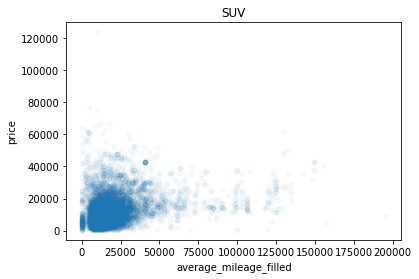

AxesSubplot(0.125,0.125;0.775x0.755)


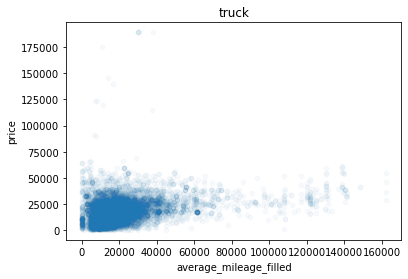

AxesSubplot(0.125,0.125;0.775x0.755)


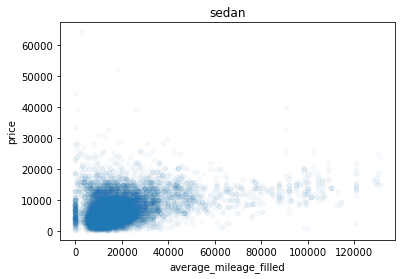

In [176]:
#Let's run the function for average mileage parameter
parameters = ['average_mileage_filled']
depend_param(df_types,car_type,parameters)

On scatter plots for dependencies price - mileage we see following large clusters:

**for SUV:**
- mileage from 0 to 25000 km 
- price in range from 0 till 40000 

**for trucks:**
- mileage in range from 0 till 40000 km
- price in range from 0 till 60000

**for sedans:**
- mileage in range from 0 till 30000 km 
- price in range from 0 till 40000

I also can conclude that there aren't positive dependence of price from mileage. We see if we have a big mileage it's not mean than the price will be also high. Vice versa the most high prices are where average mileage not more than 40K.

AxesSubplot(0.125,0.125;0.775x0.755)


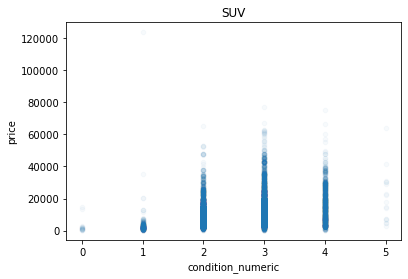

AxesSubplot(0.125,0.125;0.775x0.755)


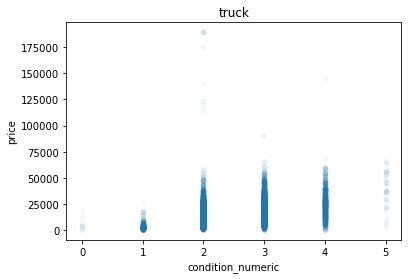

AxesSubplot(0.125,0.125;0.775x0.755)


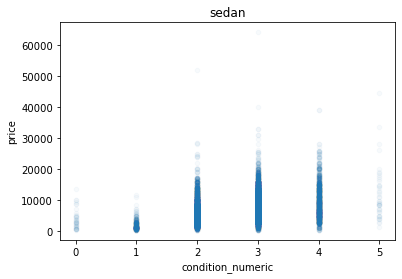

In [177]:
#Let's run this function for condition parameter
parameters = ['condition_numeric']
depend_param(df_types,car_type,parameters)

Looking on scatter plots above built to show dependence price of condition of the car I can say that categories by number 2,3,4 have the biggest number of cars and this is the most expensive cars. It's not surprising because this is good = 2, excellent = 3 and likenew= 4 conditions of the cars.

Logically that cars with salvage condition (equal to zero) have price close to zero. 

As we see, we have here small number of cars in new = 5 condition, but prices for them are alsomuch higher than conditions fair = 1 salvage = 0

(new = 5 likenew= 4 excellent = 3 good = 2 fair = 1 salvage = 0)

In [178]:
#pivot table with mean values of main parameters for each car type
parameters = ['vehicle_age_filled','average_mileage_filled','condition_numeric','price']
df_types_pv = df_types.pivot_table(index = 'type',values=parameters,aggfunc='mean')
df_types_pv

,average_mileage_filled,condition_numeric,price,vehicle_age_filled
type,,,,
SUV,18608.478569,2.684787,11453.287078,8.583368
sedan,18945.687972,2.695487,7123.047076,7.553668
truck,20165.069711,2.591955,17287.244371,8.526689


In [179]:
df_types.corr()

,price,vehicle_age_filled,average_mileage_filled,condition_numeric
price,1.000000,-0.516659,0.290312,0.242921
vehicle_age_filled,-0.516659,1.000000,-0.521313,-0.318376
average_mileage_filled,0.290312,-0.521313,1.000000,0.107412
condition_numeric,0.242921,-0.318376,0.107412,1.000000


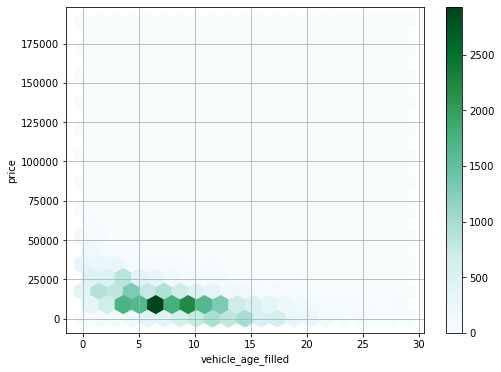

In [180]:
df_types.plot(x='vehicle_age_filled', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
plt.show()

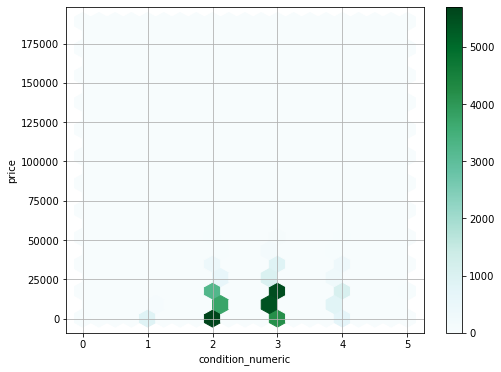

In [181]:
df_types.plot(x='condition_numeric', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
plt.show()

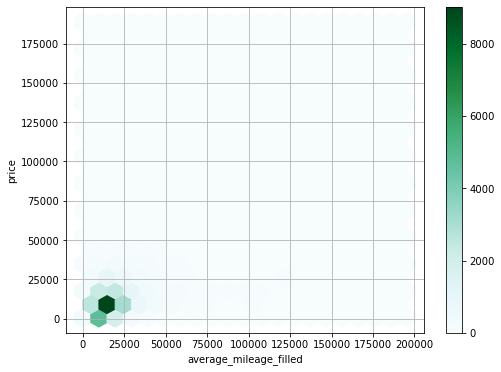

In [182]:
df_types.plot(x='average_mileage_filled', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 
plt.show()

Looking on correlation numbers and on frequency graph I can conclude following:

- There are negative correlation between price and vehicle age. This is not surprising, I already mentioned that the more the vehicle age the less is price. 
- Correlation number do not shows dependence between condition and price but on all graphs we see that we have such dependence.
- Most frequently we have cars of 2 - good and 3 - excellent conditions. And at the same time those cars have the highest prices.
- Cars of fair = 1 salvage = 0 conditions have the lowest prices.
- Most frequently we have ads with average mileage in range 0 - 25000Km 
- We see low correlation between price and average mileage. On graphs we see that usually the more mileage the less the price but too many parameters influence the price so the average mileage is influence the price in combination with all other parameters.

In [183]:
SUV.corr()

,price,vehicle_age_filled,average_mileage_filled,condition_numeric
price,1.000000,-0.616800,0.294425,0.289554
vehicle_age_filled,-0.616800,1.000000,-0.528955,-0.315577
average_mileage_filled,0.294425,-0.528955,1.000000,0.100165
condition_numeric,0.289554,-0.315577,0.100165,1.000000


In [184]:
SUV.pivot_table(index='type',values=['price','vehicle_age_filled','average_mileage_filled','condition_numeric'])

,average_mileage_filled,condition_numeric,price,vehicle_age_filled
type,,,,
SUV,18608.478569,2.684787,11453.287078,8.583368


For SUV cars we can say that the vehicle age influence the most on a car price.
Other parameters influence the price in combination. 

In [185]:
truck.corr()

,price,vehicle_age_filled,average_mileage_filled,condition_numeric
price,1.000000,-0.635276,0.326741,0.338627
vehicle_age_filled,-0.635276,1.000000,-0.524216,-0.339084
average_mileage_filled,0.326741,-0.524216,1.000000,0.128327
condition_numeric,0.338627,-0.339084,0.128327,1.000000


In [186]:
truck.pivot_table(index='type',values=['price','vehicle_age_filled','average_mileage_filled','condition_numeric'])

,average_mileage_filled,condition_numeric,price,vehicle_age_filled
type,,,,
truck,20165.069711,2.591955,17287.244371,8.526689


Also I can say for trucks: vehicle age influence on a car price the most. At the same time other parameters: average mileage and condition influence on a price for trucks more than for example for SUV cars.

In [187]:
sedan.corr()

,price,vehicle_age_filled,average_mileage_filled,condition_numeric
price,1.000000,-0.667442,0.349324,0.326338
vehicle_age_filled,-0.667442,1.000000,-0.523273,-0.296405
average_mileage_filled,0.349324,-0.523273,1.000000,0.100235
condition_numeric,0.326338,-0.296405,0.100235,1.000000


In [188]:
sedan.pivot_table(index='type',values=['price','vehicle_age_filled','average_mileage_filled','condition_numeric'])

,average_mileage_filled,condition_numeric,price,vehicle_age_filled
type,,,,
sedan,18945.687972,2.695487,7123.047076,7.553668


For sedans we see than correlation between vehicle age and price the most strong among other car types. Also average mileage have noticeable influence on a price.

For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [189]:
#Let's check if each category has at least 50 ads to plot a box-and-whisker charts
SUV['transmission'].value_counts()

automatic    11463
manual         492
other           94
Name: transmission, dtype: int64

In [190]:
truck['transmission'].value_counts()

automatic    11350
manual         421
other           88
Name: transmission, dtype: int64

In [191]:
sedan['transmission'].value_counts()

automatic    11173
manual         585
other           74
Name: transmission, dtype: int64

/Users/lin/anaconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


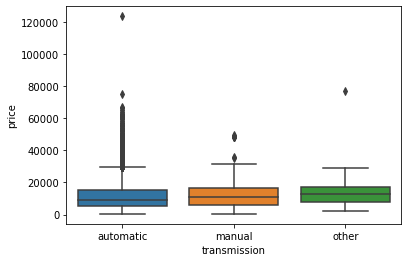

In [192]:
#Let's plot a box-and-whisker charts for transmission category for SUV cars
sns.boxplot(x=SUV['transmission'],y=SUV['price'])

For SUV ads we see that all types of transmission have almost the same median for price (very close by the price level to each other).
We have mostly cars with automatic transmission. And them have the highest prices.
What is quite odd - we have value with high price and other transmission. It might be ad about car with automatic transmission but incorrectly filled.

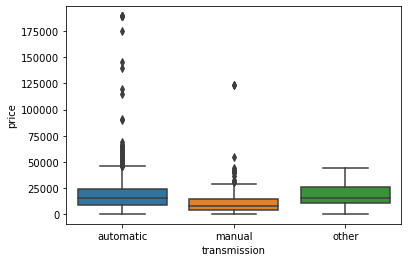

In [193]:
#boxplot for truck cars
sns.boxplot(x=truck['transmission'],y=truck['price'])

Most of truck have automatic transmission. The median price for them on the level of 20K. At the same time ads with automatic transmission have wide dispersion by the price.

Trucks with manual transmission have median price less than trucks with  automatic transmission. There are much less adsv with such transmission type. The biggest value far from whiskers is about 125K for truck.

And we have a few data for other transmission type. The median price for such ads is between automatic and manual transmission.

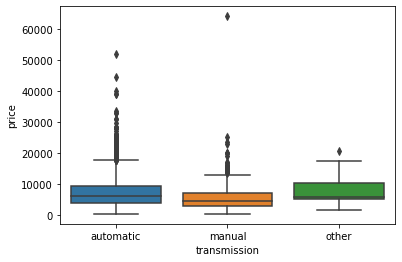

In [194]:
#boxplot for sedan cars
sns.boxplot(x=sedan['transmission'],y=sedan['price'])

We see that the mostly sedans for sale have automatic transmission. And this cars are most exspensive that cars with manual transmission. But we also can see some outlier value - some dot stands for price more than 60K. 

Median value for automatic transmission is bigger than for manual. And dispersion of data for automatic transmission is also bigger but it's not surprisingly because it is much more data than for manual transmission.

Outliers for other transmission (which is other name for nan values about transmission) is on price level from 0 till 10K but here is one outlier on level of 20K price.

Let's check if each category has at least 50 ads to plot a box-and-whisker charts. If it's less than 50 - I replace it's value to other color.

In [195]:
SUV['paint_color'].value_counts()

other     2162
black     2131
white     1917
silver    1520
grey      1162
blue      1023
red        889
green      431
brown      363
custom     280
orange      84
yellow      48
purple      39
Name: paint_color, dtype: int64

In [196]:
truck['paint_color'].value_counts()

white     3590
other     2045
black     1503
red       1032
silver     987
grey       925
blue       853
custom     295
green      266
brown      234
yellow      66
orange      48
purple      15
Name: paint_color, dtype: int64

In [197]:
sedan['paint_color'].value_counts()

other     2124
silver    2013
black     1727
grey      1609
white     1455
blue      1205
red        909
custom     270
brown      257
green      206
purple      26
yellow      22
orange       9
Name: paint_color, dtype: int64

We see above that for each car type there are to small number ads with purple, yellow and orange colors. So I replace these colors with other color if the value is less than 50, to be able to build correct boxplot.

In [198]:
#Replace purple and yellow for SUV dataset
SUV.loc[(SUV['paint_color']=='purple'),'paint_color'] = 'other'
SUV.loc[(SUV['paint_color']=='yellow'),'paint_color'] = 'other'

#Replace purple and orange for truck dataset
truck.loc[(truck['paint_color']=='orange'),'paint_color'] = 'other'
truck.loc[(truck['paint_color']=='purple'),'paint_color'] = 'other'

#Replace purple,yellow and orange for sedan dataset
sedan.loc[(sedan['paint_color']=='orange'),'paint_color'] = 'other'
sedan.loc[(sedan['paint_color']=='purple'),'paint_color'] = 'other'
sedan.loc[(sedan['paint_color']=='yellow'),'paint_color'] = 'other'

/Users/lin/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [199]:
#Now everything correct

#SUV['paint_color'].value_counts()
#truck['paint_color'].value_counts()
#sedan['paint_color'].value_counts()

In [200]:
SUV.pivot_table(index='paint_color',values='price').sort_values('price',ascending=False)

,price
paint_color,
orange,15939.630952
black,13800.427499
white,12602.045383
other,11600.823922
grey,11200.552496
silver,10407.544737
red,10349.143982
custom,10184.646429
blue,9216.998045


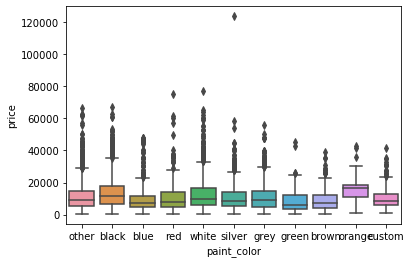

In [201]:
#We can build boxplots for colors for SUV cars

sns.boxplot(x=SUV['paint_color'],y=SUV['price'])

Among SUV cars the highest average prices have cars with black, white, and what is quite odd - orange color.

On a plot we see that some cars with grey colour also have high prices.

Vast majority of cars is white. 

In [202]:
truck.pivot_table(index='paint_color',values='price').sort_values('price',ascending=False)

,price
paint_color,
black,20050.171657
grey,18156.156757
white,17760.951811
other,17179.450190
silver,17039.892604
blue,15907.057444
yellow,15851.803030
custom,15543.566102
red,15076.393411


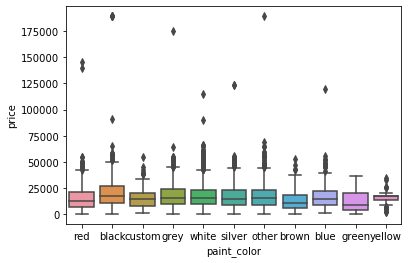

In [203]:
#For trucks
sns.boxplot(x=truck['paint_color'],y=truck['price'])

On plot for trucks we see that we have a lot of values with wide dispersion. 

The highest average prices have cars of black, grey and white colors. The lowest price - cars of green color.

In [204]:
sedan.pivot_table(index='paint_color',values='price').sort_values('price',ascending=False)

,price
paint_color,
black,7728.155761
white,7661.715464
custom,7312.318519
red,7200.157316
grey,7147.056557
other,7099.844567
silver,6932.459513
blue,6651.149378
brown,5211.575875


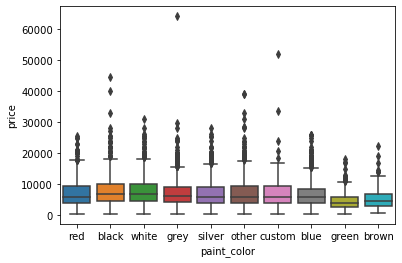

In [205]:
#For sedans
sns.boxplot(x=sedan['paint_color'],y=sedan['price'])

On plot for sedans we see that cars of black, grey and custom colors have values with very high price. 
At the same time the highest prices have sedan cars of black, white and custom colors.

### Conclusion

I plotted histograms for the main parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. I determined the outliers and filtered them from the original dataset.

Was filtered following entries:
* Cars with price less than 400
* Cars with price more than 300K
* Cars with age more than 30
* Cars with odometer more than 300000
I plotted the histogram to show the difference between original dataset and filtered one.

I studied how many days advertisements were displayed ( days_listed ). I studied the ads showed small amount of time (less than 25 days) as well as  the ads showed abnormally long time (more than 120 days).

I analyzed the number of ads and the average price for each type of vehicle. I studied how different factors impact the car price.

### Step 5. Overall conclusion

Main conclusions I can make from study of the data and from study how parameters influence price of cars:

**Price**

On the histogram of price column we saw a big peak around price = 7000-10000. So I can make a conclusion that the vast part of the ads are cars with prices in that range.
On the histogram and in descriptive stats I found that we have a lot of data with price equal to 1.0  in the dataset. The slice of data with abnormally small price contained 1041 rows (2% of data), I deleted it. 
I also found data with extremely high prices. So I also deleted rows where price were more than 300K and I got filtered dataframe.

**Vehicle's age**

We see that the most of the cars have age around 3.5-4 years and 7-8 years. We also have a lots of new cars with age 0-1.5 years and we have peak around 11-12 years. After x equal to 15 years the number of cars for sale is decreasing.
I filtered entries from the dataset where vehicle age were more than 30 years.

**Mileage**

While working with 'odometer' column to identify there missing values. I got 7892 rows with empty entries about car's mileage. This is 15,31% of database. I replaced these values with median value.
On a histogram of this column I found a big peak around mileage 125000. And also we had peaks around mileage 100K and 140K.There are located missing values which I replaced by median value.
We also have a peak around zero mileage - a lot of new cars were placed for sale.

**Cylinders**

The most of the cars have 8.0,6.0 and 4.0 cylinders. Only two cars among all ads had 12.0 cylinders. relatively small number of cars have 10.0, 5.0 and 3.0 cylinders. We don't have outliers in cylinders column, so I filtered nothing.

**Condition**

Mostly we have ads with cars of excellent and good conditions - 87,22% of all car ads. The other conditions encounter in 12,77% of all other cases. Here also was nothing to filter.

I stydied **how many days advertisements were displayed** ( days_listed ). Following conclusions can be make about ads lifecycle:
- Median time which ads was showed is 33 days. 
- Average time which ads was showed is 39 days.
- Only 52 ads vere deleted from the website in the same day it's very small number in comparison with the size of the data.
- The biggest number of car ads were published in Thursdays - 14.59%
- The smallest number of car ads were published in Wednesdays - 14.19%
- Among days of the week ads were published almost evenly
- The biggest number of car ads were published in October and December - 8.98% and 8.84% accordingly
- The smallest number of car ads were published in April and Februar - 5.46% and 7,76%
- Among other months car ads were published quite evenly
- 69,31 % of ads were published in 2018

**Conclusions for the ads showed small amount of time (less than 25 days)**:

Portrait of the car showed small amount of time:
- Ads with lifetime less than 25 days has the average lifetime of 14 days.
- Average price for such cars is 12351 while median price is 9500.
- Average model year is 2009, median model year is 2011.
- This is mostly cars of sedan, SUV and truck types. 
- Mostly with 8.0, 6.0 and 4.0 cylinders. 
- Almost all of them have automatic transmission. 
- The most popular colour is white. 
- The biggest half of them isn't 4wd.


- Among days of the week ads were published almost evenly
- The biggest number of car ads were published in October - 9,19%
- The smallest number of car ads were published in April - 5,25%
- Among other months car ads were published quite evenly
- 69,71 % of ads were published in 2018

**Conclusions for the ads showed abnormally long time (more than 120 days)**:

Portrait of the car showed long time:
* Average lifetime for such cars is 144 days, median lifetime is 137 days
* Average price for such cars is 11812, while median price is 8998
* Average model year is 2009, median model year is 2010
* This is mostly cars of sedan, SUV and truck types.
* Mostly with 8.0, 6.0 and 4.0 cylinders.
* Also almost all of them have automatic transmission.
* The most popular colour is also white
* Mostly cars isn't 4wd


* Among days of the week ads were published almost evenly
* The biggest number of car ads were published in Tuesdays - 16,33% and Saturdays - 15,07%
* The smallest number of car ads were published in Fridays - 12,68%
* The biggest number of car ads were published in Februar - 10,2%
* The smallest number of car ads were published in April - 5,02%
* Among other months car ads were published quite evenly
* 69,71 % of ads were published in 2018

While analyzing **the number of ads and the average price for each type of vehicle** I can say following:

**The most expensive cars are following types:**
* Truck with average price of 17287
* Bus with average price of 17135
* Pickup with average price of 16210
* The most cheap cars are hatchbacks with average price of 6940.

**The greatest number of ads have two types of cars:**
* SUV (aka sport utility vehicle) and truck.
* The next car type by the number of ads (very close to the main two groups) is sedan.
* The smallest number of ads have buses.

While analyzing **what factors impact the most on a car price** I came to following conclusions:

* Looking on plots for dependecies car price from vehicle age, I can say than the more the vehicle age the less is price. On all plots are the downtrend for each type of cars: SUV, truck and sedan.
* Correlation between vehicle age and car price is also negative and highest among other parameters.
* Analizing dependence price of condition of the car I can say some obvious thing: the better condition (excellent, good, new) the higher the car price. 
* Cars with bad condition like fair or salvage have the lowest prices.
* Mostly cars of all types we study (SUV, truck and sedan) have automatic transmission and those cars have the highest prices.
* Among SUV cars the highest average prices have cars with black, white, and what is quite odd - orange color.
* Vast majority of SUV cars is white.
* Among trucks highest average prices have cars of black, grey and white colors. The lowest price - trucks of green color.
* Among sedans we see that cars of black, grey and custom colors have values with very high price. At the same time the highest average prices have sedan cars of black, white and custom colors.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [X]  missing values filled in
- [X]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn